# Espinardo FIB Sublimation experiments December 2019

#### FIB measurements Sublimation experiments @ Espinardo campus

### Import functions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
from IPython.display import Image as IM
from IPython.display import Math
from IPython.display import Latex

In [3]:
from PIL import Image, ImageFilter

In [4]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Fri May 15 10:47:27 2020


In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tables            as tb
import random
import glob
import warnings
#sns.set()
from matplotlib import cm as cmp

In [6]:
import invisible_cities.core .fit_functions  as     fitf
from  invisible_cities.core.system_of_units import *

In [7]:
from sabat.sbt_espinardo import get_jpeg_dirs
from sabat.sbt_espinardo import get_files
from sabat.sbt_espinardo import read_xls_files
from sabat.sbt_espinardo import sort_by_list
from sabat.sbt_espinardo import sort_files
from sabat.sbt_espinardo import load_LIVE_images
from sabat.sbt_espinardo import get_live_dirs
from sabat.sbt_espinardo import read_TOM
from sabat.sbt_espinardo import get_TOM_files
from sabat.sbt_espinardo import select_TOM
from sabat.sbt_espinardo import select_set_TOM
from sabat.sbt_espinardo import select_df_TOM
from sabat.sbt_espinardo import mean_and_std_toms
from sabat.sbt_espinardo import tom_I, tom_mean_I, tom_I_max
from sabat.sbt_espinardo import avg_intensity
from sabat.sbt_espinardo import total_intensity
from sabat.sbt_espinardo import it
from sabat.sbt_espinardo import itot
from sabat.sbt_espinardo import total_energy
from sabat.sbt_espinardo import peak_energy
from sabat.sbt_espinardo import peak_energy_ratio_df12
from sabat.sbt_espinardo import total_energy_ratio_df12
from sabat.sbt_espinardo import total_energy_ratio_dfs
from sabat.sbt_espinardo import peak_energy_ratio_dfs
from sabat.sbt_espinardo import peak_fbi
from sabat.sbt_espinardo import total_fbi
from sabat.sbt_espinardo import dict_ratio
from sabat.sbt_espinardo import tom_signal_above_bkg
from sabat.sbt_espinardo import tom_ratio
from sabat.sbt_espinardo import tom_ratio_with_error
from sabat.sbt_espinardo import dict_ratio_with_error

In [8]:
from sabat.sbt_types import FoV, CircularFoV, Monolayer
from sabat.sbt_types import Laser, PulsedLaser, GLaser, GaussianBeam
from sabat.sbt_types import Molecule
from sabat.sbt_types import Molecule2P
from sabat.sbt_types import DyeSample
from sabat.sbt_types import Microscope
from sabat.sbt_types import CCD
from sabat.sbt_core import  power_density
from sabat.sbt_core import  photon_density
from sabat.sbt_core import  fluorescence_per_molecule
from sabat.sbt_core import  duration_of_fluorescence
from sabat.sbt_core import  diffraction_limit
from sabat.sbt_core import  photoelectrons_per_pixel
from sabat.sbt_core import  fluorescence_2p_gb
from sabat.sbt_core import  fluorescence_2p_dl
from sabat.sbt_core import  absorbed_photons_per_fluorophore_per_pulse_2p
from sabat.sbt_types import  photon, molecule, GM, us, ucm2, ucm3, gp 

In [9]:
from sabat.sbt_core  import  FIB 
from sabat.sbt_core  import  FLUO3
from sabat.sbt_core import  Setup

In [10]:
from sabat.sbt_analysis import get_columns_from_names
from sabat.sbt_analysis import get_spectrum_from_df
from sabat.sbt_analysis import get_WI_from_df
from sabat.sbt_analysis import get_spectrum_from_pills

from sabat.sbt_analysis import subtract_spectra2
from sabat.sbt_analysis import subtract_spectra
from sabat.sbt_analysis import add_spectra
from sabat.sbt_analysis import subtract_series
from sabat.sbt_analysis import subtract_spectra_thr_zero
from sabat.sbt_analysis import subtract_spectra_thr_pzero
from sabat.sbt_analysis import subtract_spectra_thr_bkg
from sabat.sbt_analysis import scale_spectra
from sabat.sbt_analysis     import sum_spectrum_region
from sabat.sbt_analysis     import sum_spectrum_error_region
from sabat.sbt_analysis     import interval_area
from sabat.sbt_analysis     import interval_error_area
from sabat.sbt_analysis import expo_seed
from sabat.sbt_analysis import fit_intensity
from sabat.sbt_analysis import volcm3
from sabat.sbt_analysis import n_m
from sabat.sbt_analysis import cmcm3
from sabat.sbt_analysis import norm_fbi_to_pva
from sabat.sbt_analysis import area
from sabat.sbt_analysis import disc_factor
from sabat.sbt_analysis import disc_factor_and_error
from sabat.sbt_analysis import rdf
from sabat.sbt_analysis import loc_w
from sabat.sbt_analysis import error_ratio
from sabat.sbt_analysis import error_prod

In [11]:
from sabat.sbt_plot import set_fonts
from sabat.sbt_plot import plot_spectrum
from sabat.sbt_plot import plot_spectra
from sabat.sbt_plot import plot_fbi
from sabat.sbt_plot import plot_tom_set
from sabat.sbt_plot import plot_TOM
from sabat.sbt_plot import plot_TOMS
from sabat.sbt_plot import plot_profile_set
from sabat.sbt_plot import display_profile
from sabat.sbt_plot import display_profiles
from sabat.sbt_plot import get_profile

from sabat.sbt_plot import plot_fbis
from sabat.sbt_plot import plot_baseline
from sabat.sbt_plot import plot_baselines
from sabat.sbt_plot import plot_tom_ratio
from sabat.sbt_plot import plot_tom_ratios
from sabat.sbt_plot import display_tom_ratios
from sabat.sbt_plot import display_tom_ratio

In [12]:
from jupyterthemes import jtplot

In [13]:
jtplot.style('default', grid=False)

In [14]:

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 25,
        }

### Sublimation calculations

In [66]:
def subl_nba(d_pel = 1.3 * cm, thick = 100 * nm):
    """For a pellet with 1.3 cm diameter compute number of barium molecules from thickness [in cm]
    Input: film thickness from QMB [cm]"""
    
    M_ba = 336.24 * gram/mol # molec mass [g/mol]
    p_ba = 3.2 * gram/cm3 # molecular density [g/cm^3]
    NA = 6.023e23 # Avogadro constant [molec/mol]
 
    S_pel = np.pi*(d_pel/2)**2 # pellet area [cm^2]

    V_ba = thick * S_pel
    m_ba = V_ba * p_ba # Deposited mass
    N_ba = NA * m_ba / M_ba # Number of molecules deposited
    print(f'Total number of Barium perchlorate molecules deposited ={N_ba:.2e}')
    return m_ba, N_ba

In [15]:
path = '/Users/pabloherrero/sabat/2pa/Results_samples_dec19'

In [16]:
ipath = os.path.join(path, 'Espinardo_20191204')
print(ipath)

/Users/pabloherrero/sabat/2pa/Results_samples_dec19/Espinardo_20191204


# SFBI series: Normalisation to FBI without Ba++

In [17]:
tomFbiNone = read_TOM(ipath, name='TOMO_SFBI_800nm_100mW_S2_1mic_none_02.xls')
tomFbiAlta450 = read_TOM(ipath, name='TOMO_SFBI_800nm_100mW_S2_1mic_Alta450nm_02.xls')
tomFbiBanda420 = read_TOM(ipath, name='TOMO_SFBI_800nm_100mW_S2_1mic_Banda420nm_02.xls')

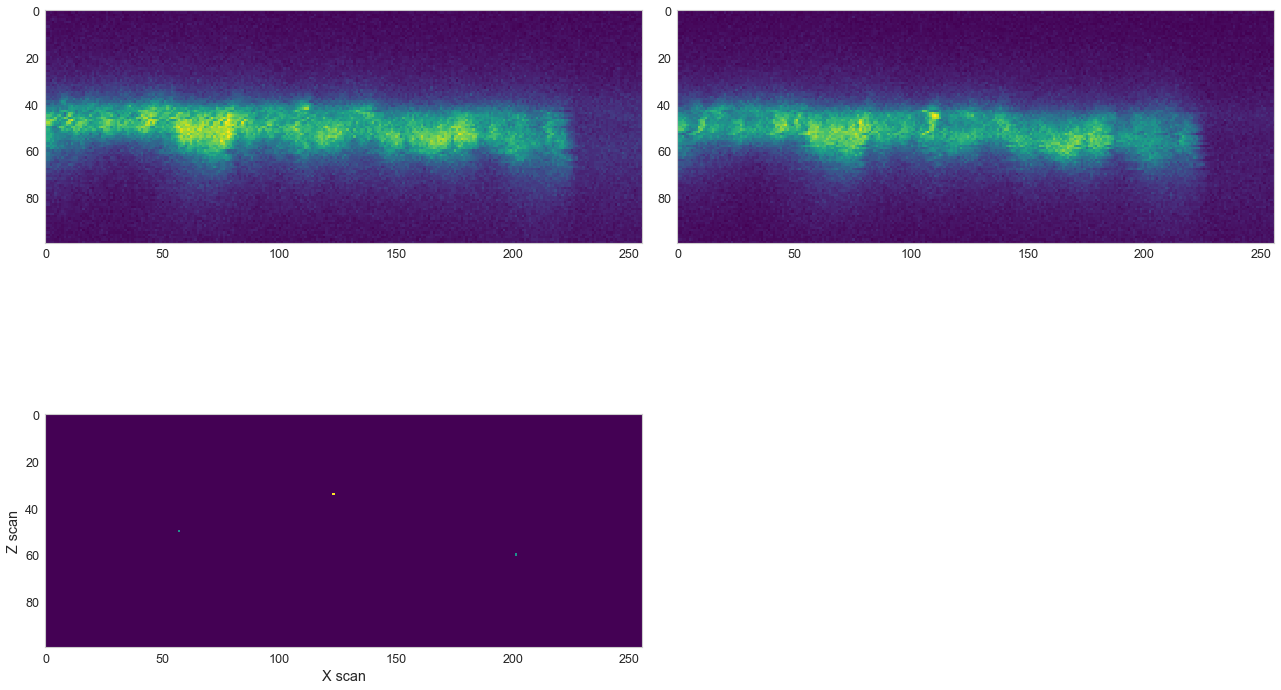

In [18]:
plot_TOMS((tomFbiNone,tomFbiAlta450,tomFbiBanda420), xw=2, yw=2, 
          vmin=4, interpolation=False, cmap='viridis', figsize=(18,12))

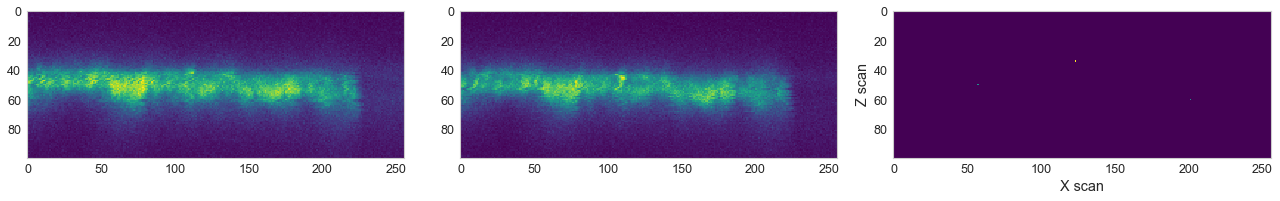

In [19]:
plot_TOMS((tomFbiNone,tomFbiAlta450,tomFbiBanda420), xw=1, yw=3, 
          vmin=4, interpolation=False, cmap='viridis', figsize=(18,12))

In [18]:
iB450  = tom_signal_above_bkg(tomFbiAlta450, bmax=4)[4]
print(f'iB450 = {iB450:.2e}')

iB450 = 1.32e+06


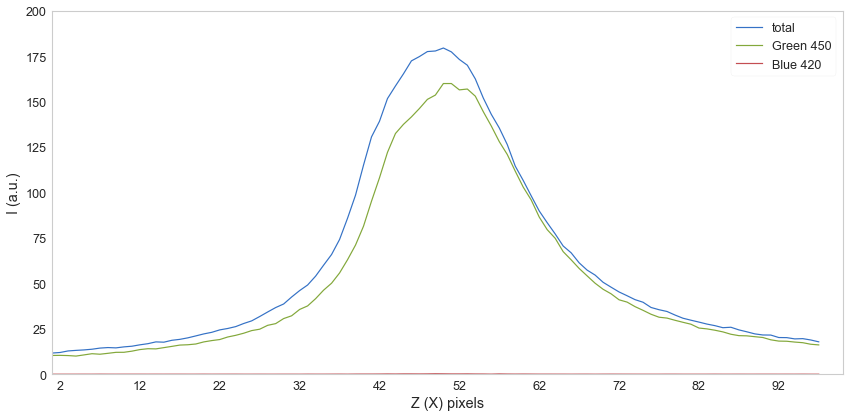

In [23]:
display_profiles((tomFbiNone, tomFbiAlta450, tomFbiBanda420), cuts=(2,2,2), labels=('total','Green 450','Blue 420'), zrange=(1,100), yrange=(0,200), xlsx=False, figsize=(12,6))

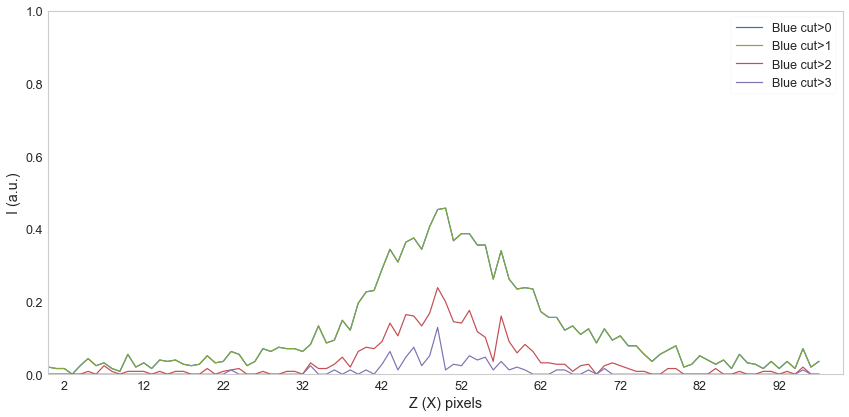

In [24]:
display_profiles((tomFbiBanda420, tomFbiBanda420, tomFbiBanda420, tomFbiBanda420), cuts=(0,1,2,3), labels=('Blue cut>0','Blue cut>1','Blue cut>2', 'Blue cut>3'),
                zrange=(0,100), yrange=(0,1), xlsx=False, figsize=(12,6))

## Green to total for FBI

In [19]:
rdGT = tom_ratio(tomFbiNone, tomFbiAlta450, bcut=10)
print(f' Ratio Blue/Green: Normalisation: {rdGT}')

 Ratio Blue/Green: Normalisation: {0: 0.8681741578772886, 1: 0.8681741578772886, 2: 0.8681738103413844, 3: 0.8681332225188845, 4: 0.8680452339506413, 5: 0.8678101097011811, 6: 0.867232519480314, 7: 0.8663183986709693, 8: 0.8651092356837228, 9: 0.8636514308134177, 10: 0.8614319824577806}


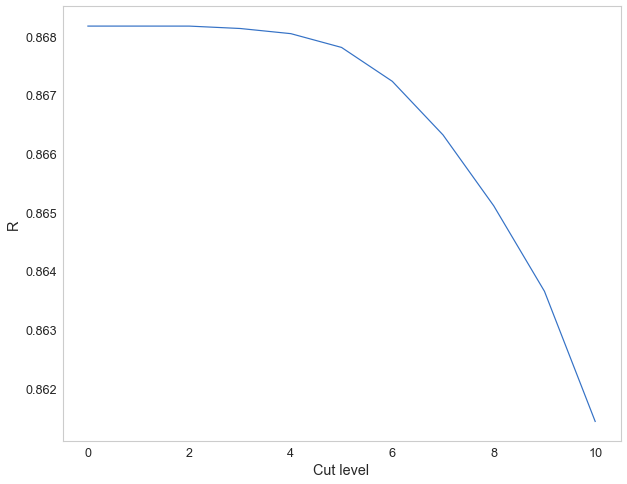

In [26]:
plot_tom_ratio(rdGT, log=False)

#### Plot suggests that above 4 one starts to cut on the signal

In [20]:
rGT,srGT = tom_ratio_with_error(tomFbiNone, tomFbiAlta450, bcut=4)
print(f' Green for SFpA = {rGT} +- {srGT}')

 Green for SFpA = 0.8680452339506413 +- 0.0010338236457820274


## Blue to total for FBI

In [48]:
rdBT = tom_ratio(tomFbiNone, tomFbiBanda420, bcut=6)
print(f' Ratio Blue/Green: Normalisation: {rdBT}')

 Ratio Blue/Green: Normalisation: {0: 0.001979875658008775, 1: 0.0005859219240911455, 2: 0.00014302068922790578, 3: 3.427250995385734e-05, 4: 1.054588812526406e-05, 5: 3.955333734579967e-06, 6: 0.0}


In [22]:
rBT,srBT = tom_ratio_with_error(tomFbiNone, tomFbiBanda420, bcut=4)
print(f' Blue/Total: Normalisation = {rBT} +- {srBT}')

 Blue/Total: Normalisation = 1.054588812526406e-05 +- 2.6364859332489068e-06


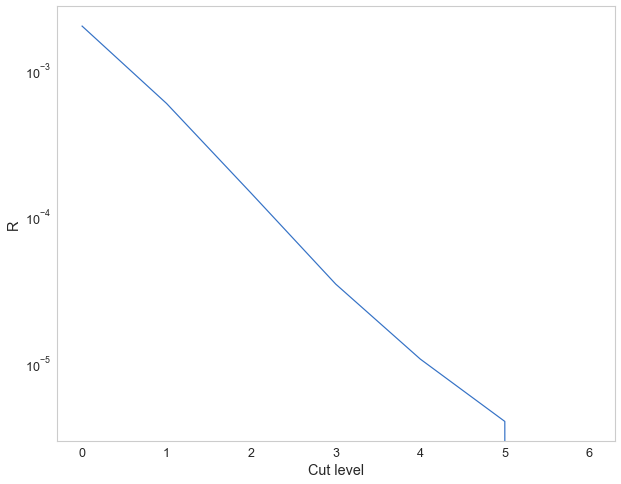

In [30]:
plot_tom_ratio(rdBT, log=True)

In [49]:
rdBG = tom_ratio(tomFbiAlta450, tomFbiBanda420, bcut=6)
print(f' Blue/Green for SFpA = {rdBG}')

 Blue/Green for SFpA = {0: 0.002280505172890229, 1: 0.0006748898464378874, 2: 0.0001647373918958313, 3: 3.947839924201474e-05, 4: 1.2149007577943476e-05, 5: 4.557833206093823e-06, 6: 0.0}


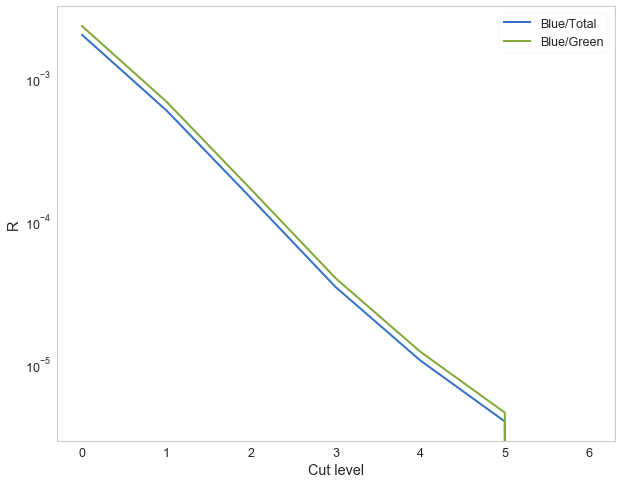

In [50]:
plot_tom_ratios((rdBT, rdBG), labels=('Blue/Total','Blue/Green'), log=True)

# SS10 (FBI-Ba) / SS04_ALIBa

In [23]:
tomFbiBanda430SS10 = read_TOM(ipath, name='TOMO_SS10_800nm_100mW_S2_1mic_Banda430nm_02.xls')
tomFbiBanda420SS10 = read_TOM(ipath, name='TOMO_SS10_800nm_100mW_S2_1mic_Banda420nm_02.xls')
tomFbiAlta450SS10 = read_TOM(ipath, name='TOMO_SS10_800nm_100mW_S2_1mic_Alta450nm_02.xls')
tomFbiBaja450SS10 = read_TOM(ipath, name='TOMO_SS10_800nm_100mW_S2_1mic_Baja450nm_02.xls')
tomFbiTotSS10 = tomFbiAlta450SS10 + tomFbiBaja450SS10

In [24]:
tomFbiBanda430ALIBa = read_TOM(ipath, name='TOMO_ALI4FBIBa_800nm_100mW_S2_2mic_Banda430nm.xls')
tomFbiBanda420ALIBa = read_TOM(ipath, name='TOMO_ALI4FBIBa_800nm_100mW_S2_2mic_Banda420nm.xls')
tomFbiTotALIBa = read_TOM(ipath, name='TOMO_ALI4FBIBa_800nm_100mW_S2_2mic_None.xls')
tomFbiBaja450ALIBa = read_TOM(ipath, name='TOMO_ALI4FBIBa_800nm_100mW_S2_2mic_Baja450nm.xls')
tomFbiAlta450ALIBa = tomFbiTotALIBa - tomFbiBaja450ALIBa

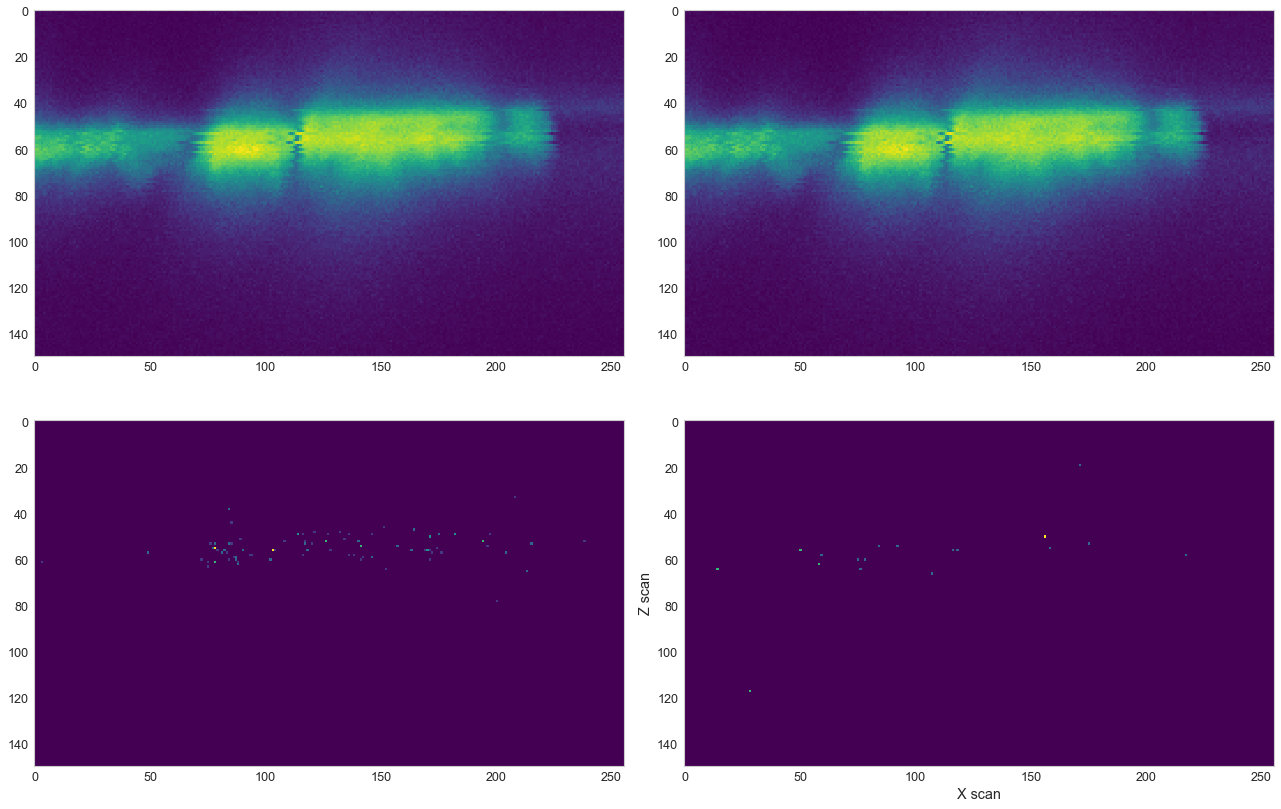

Text(0.5, 0.98, 'ALI barium deposition')

<Figure size 460.8x403.2 with 0 Axes>

In [25]:
plot_TOMS((tomFbiTotALIBa,tomFbiAlta450ALIBa,tomFbiBanda430ALIBa,tomFbiBanda420ALIBa), xw=2, yw=2, 
          vmin=4, interpolation=False, cmap='viridis', figsize=(18,12))
plt.suptitle('ALI barium deposition')

In [25]:
df = tomFbiBanda430ALIBa
cut = 2
prf  = df[df>=cut].fillna(0).mean()
indx = prf.index.values[1:-1].astype(str)
Z    = np.char.replace(indx, ',', '.') .astype(float).astype(int)
ZV   = prf.values[1:-1]
Z, ZV

(array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
         54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
         80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
        106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
        132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
        158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
        184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208,
        210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234,
        236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260,
        262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286,
        288, 290, 292, 294, 296]),
 array([0.0078125 , 0.        , 0.        , 0.0078125 , 0.        ,
        0.        , 0.0078125 , 0.015625  , 0.        , 0.        ,
        0.        , 0.0234

In [27]:
df.shape

(256, 150)

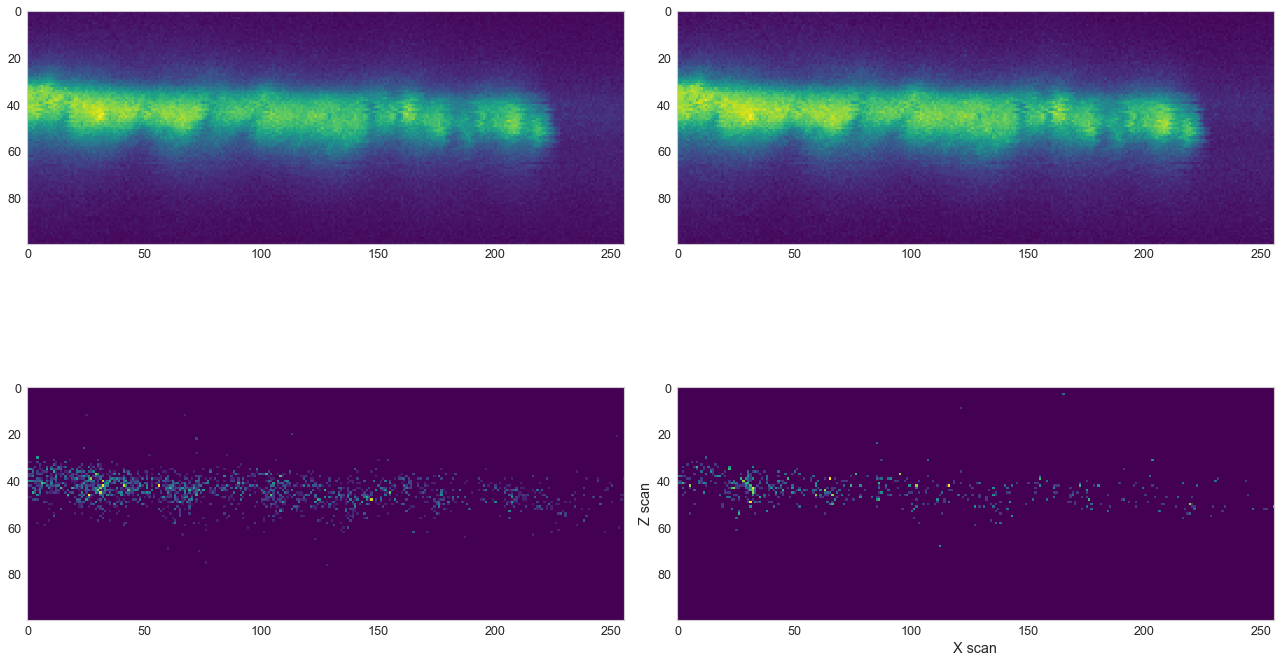

In [26]:
plot_TOMS((tomFbiTotSS10,tomFbiAlta450SS10,tomFbiBanda430SS10,tomFbiBanda420SS10), xw=2, yw=2, 
          vmin=4, interpolation=False, cmap='viridis', figsize=(18,12))

## Total signal above bkg

In [27]:
ic = 4
iB420  = tom_signal_above_bkg(tomFbiBanda420ALIBa, bmax=4)[ic]
iB430  = tom_signal_above_bkg(tomFbiBanda430ALIBa, bmax=4)[ic]
iB450A  = tom_signal_above_bkg(tomFbiAlta450ALIBa, bmax=4)[ic]
iB450B  = tom_signal_above_bkg(tomFbiBaja450ALIBa, bmax=4)[ic]

print(f'iB420 = {iB420:.2e}')
print(f'iB430 = {iB430:.2e}')
print(f'iB450A = {iB450A:.2e}')
print(f'iB450B = {iB450B:.2e}')

iB420 = 9.60e+01
iB430 = 4.43e+02
iB450A = 3.78e+06
iB450B = 7.58e+04


In [28]:
ic = 4
iB420  = tom_signal_above_bkg(tomFbiBanda420SS10, bmax=4)[ic]
iB430  = tom_signal_above_bkg(tomFbiBanda430SS10, bmax=4)[ic]
iB450A  = tom_signal_above_bkg(tomFbiAlta450SS10, bmax=4)[ic]
iB450B  = tom_signal_above_bkg(tomFbiBaja450SS10, bmax=4)[ic]

print(f'iB420 = {iB420:.2e}')
print(f'iB430 = {iB430:.2e}')
print(f'iB450A = {iB450A:.2e}')
print(f'iB450B = {iB450B:.2e}')

iB420 = 2.78e+03
iB430 = 8.83e+03
iB450A = 2.49e+06
iB450B = 2.07e+05


## Average profiles

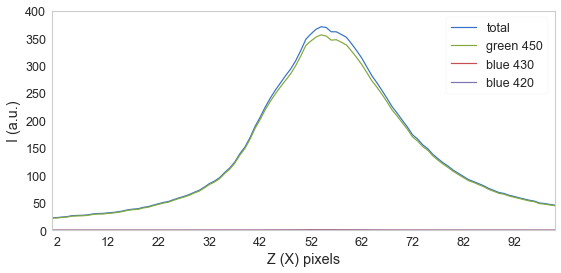

In [29]:
display_profiles((tomFbiTotALIBa, tomFbiAlta450ALIBa, tomFbiBanda430ALIBa, tomFbiBanda420ALIBa), cuts=(2,2,2,2), labels=('total','green 450','blue 430','blue 420'),
                 zrange=(1,100), yrange=(0,400), xlsx=False, figsize=(8,4))

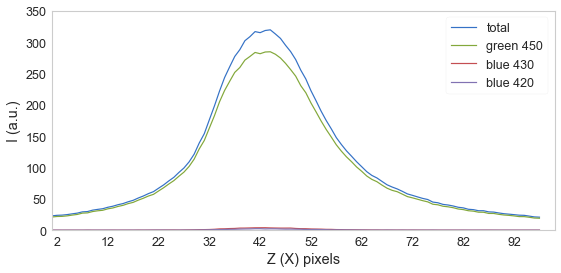

In [30]:
display_profiles((tomFbiTotSS10, tomFbiAlta450SS10, tomFbiBanda430SS10, tomFbiBanda420SS10), cuts=(2,2,2,2), labels=('total','green 450','blue 430','blue 420'),
                 zrange=(1,100), yrange=(0,350), xlsx=False, figsize=(8,4))

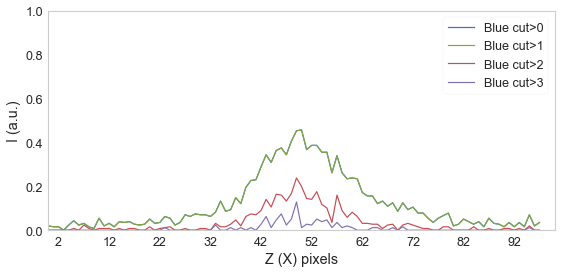

In [147]:
display_profiles((tomFbiBanda420, tomFbiBanda420, tomFbiBanda420, tomFbiBanda420), cuts=(0,1,2,3), labels=('Blue cut>0','Blue cut>1','Blue cut>2', 'Blue cut>3'),
                zrange=(0,100), yrange=(0,1), xlsx=False, figsize=(8, 4))

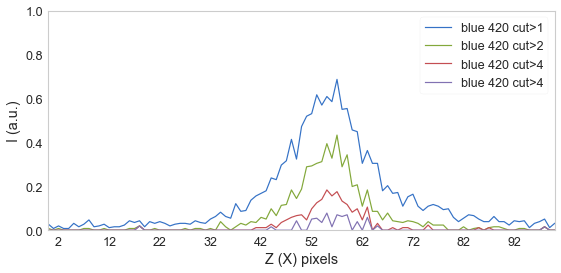

In [39]:
display_profiles((tomFbiBanda420ALIBa, tomFbiBanda420ALIBa, tomFbiBanda420ALIBa, tomFbiBanda420ALIBa), cuts=(1,2,3,4), labels=('blue 420 cut>1','blue 420 cut>2','blue 420 cut>4','blue 420 cut>4'),
                zrange=(0,100), yrange=(0,1), xlsx=False, figsize=(8,4))

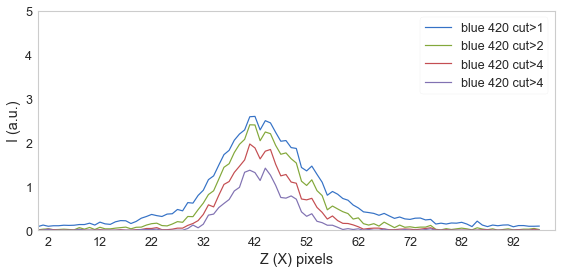

In [51]:
display_profiles((tomFbiBanda420SS10, tomFbiBanda420SS10, tomFbiBanda420SS10, tomFbiBanda420SS10), cuts=(1,2,3,4), labels=('blue 420 cut>1','blue 420 cut>2','blue 420 cut>4','blue 420 cut>4'),
                zrange=(0,100), yrange=(0,5), xlsx=False, figsize=(8,4))

In [44]:
rdGT10 = tom_ratio(tomFbiTotALIBa, tomFbiAlta450ALIBa, bcut=10)
print(f' Ratio Blue/Green: Normalisation: {rdGT10}')

 Ratio Blue/Green: Normalisation: {0: 0.9707563163251032, 1: 0.9707558029853275, 2: 0.9707537195996664, 3: 0.9707435968250807, 4: 0.9707183851990266, 5: 0.9706861920927158, 6: 0.9705824590948824, 7: 0.9704592733276035, 8: 0.9703130985391887, 9: 0.9701582866467382, 10: 0.9698824372291286}


In [46]:
rdGT10 = tom_ratio(tomFbiTotSS10, tomFbiAlta450SS10, bcut=10)
print(f' Ratio Blue/Green: Normalisation: {rdGT10}')

 Ratio Blue/Green: Normalisation: {0: 0.9136674055565104, 1: 0.9136674055565104, 2: 0.9136674055565104, 3: 0.9136674055565104, 4: 0.9136674055565104, 5: 0.9136655693491453, 6: 0.9136653791152252, 7: 0.9136600157694241, 8: 0.9136477565897594, 9: 0.9136033610853015, 10: 0.9135230624019862}


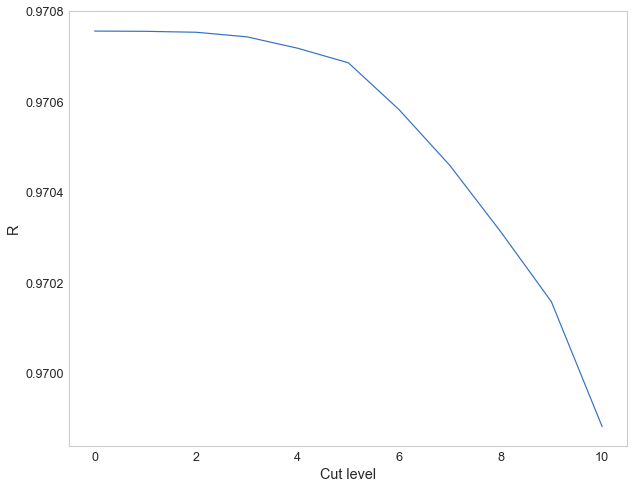

In [45]:
plot_tom_ratio(rdGT10, log=False)

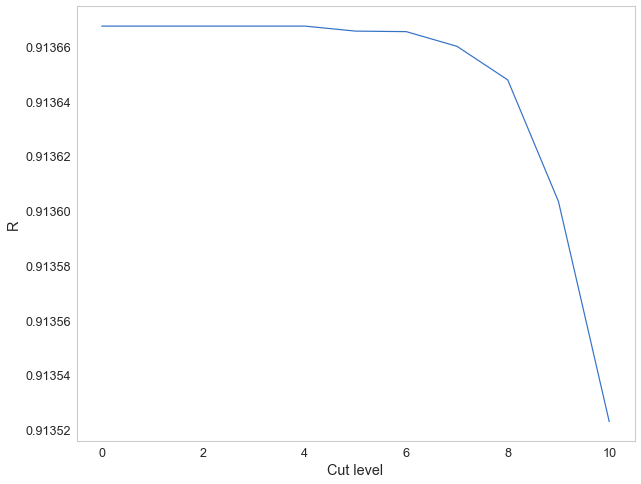

In [47]:
plot_tom_ratio(rdGT10, log=False)

### Ratio Blue/Total

In [31]:
rdBTALI = tom_ratio(tomFbiTotALIBa, tomFbiBanda420ALIBa, bcut=6)
print(f' Ratio Blue/Total ALIBa: {rdBTALI}')

 Ratio Blue/Total ALIBa: {0: 0.001010509348558991, 1: 0.0003839781522591442, 2: 0.0001334684787237128, 3: 4.414743600931819e-05, 4: 2.4640910070945288e-05, 5: 7.957338398649819e-06, 6: 1.7970397620719355e-06}


In [32]:
rdBT10 = tom_ratio(tomFbiTotSS10, tomFbiBanda420SS10, bcut=6)
print(f' Ratio Blue/Total SS10: {rdBT10}')

 Ratio Blue/Total SS10: {0: 0.0060282687796272055, 1: 0.004219237283529514, 2: 0.002800950714725355, 3: 0.0017521090677795551, 4: 0.0010205640535232412, 5: 0.0004899001250089974, 6: 0.0002365040297495628}


In [33]:
rBTALI,srBTALI = tom_ratio_with_error(tomFbiTotALIBa, tomFbiBanda420ALIBa, bcut=4)
print(f' Ratio Blue/Total ALIBa, cut=3 = {rBTALI} +- {srBTALI}')

 Ratio Blue/Total ALIBa, cut=3 = 2.4640910070945288e-05 +- 2.5149333375347873e-06


In [34]:
rBT10,srBT10 = tom_ratio_with_error(tomFbiTotSS10, tomFbiBanda420SS10, bcut=4)
print(f' Ratio Blue/Total SS10, cut=4 = {rBT10} +- {srBT10}')

 Ratio Blue/Total SS10, cut=4 = 0.0010205640535232412 +- 1.93694591314832e-05


#### Relative abundance from ratio B/Tot

In [24]:
relAb = rBTALI/ rBT10

In [25]:
drelAb = relAb * np.sqrt((srBTALI/rBTALI)**2 + (srBT10/rBT10)**2 )

In [26]:
print(f' Ratio BG ALIBa / BG SS10, cut=4 = {relAb} +- {drelAb}')

 Ratio BG ALIBa / BG SS10, cut=4 = 0.02414440326981803 +- 0.0025065021557702416


### Ratios Blue/Green

In [35]:
rdBGALI = tom_ratio(tomFbiAlta450ALIBa, tomFbiBanda420ALIBa, bcut=6)
print(f' Ratio Blue/Total ALIBA: = {rdBGALI}')

 Ratio Blue/Total ALIBA: = {0: 0.0010409505779827187, 1: 0.0003955455646809539, 2: 0.00013748953625308227, 3: 4.5477957468591125e-05, 4: 2.5384200450569557e-05, 5: 8.197642516676253e-06, 6: 1.8515065311892888e-06}


In [36]:
rdBG10 = tom_ratio(tomFbiAlta450SS10, tomFbiBanda420SS10, bcut=6)
print(f' Ratio Blue/Total SS10: = {rdBG10}')

 Ratio Blue/Total SS10: = {0: 0.0065978809608025985, 1: 0.0046179137592848645, 2: 0.003065613042220007, 3: 0.0019176661628991286, 4: 0.001116997331103894, 5: 0.0005361919518954626, 6: 0.00025885191138421863}


In [37]:
rBGALI,srBGALI = tom_ratio_with_error(tomFbiAlta450ALIBa, tomFbiBanda420ALIBa, bcut=3)
print(f' Ratio Blue/Green ALIBa, cut=4 = {rBGALI} +- {srBGALI}')

 Ratio Blue/Green ALIBa, cut=4 = 4.5477957468591125e-05 +- 3.4677405979938378e-06


In [38]:
rBG10,srBG10 = tom_ratio_with_error(tomFbiAlta450SS10, tomFbiBanda420SS10, bcut=4)
print(f' Ratio Blue/Green SS10, cut=4 = {rBG10} +- {srBG10}')

 Ratio Blue/Green SS10, cut=4 = 0.001116997331103894 +- 2.1200703854885698e-05


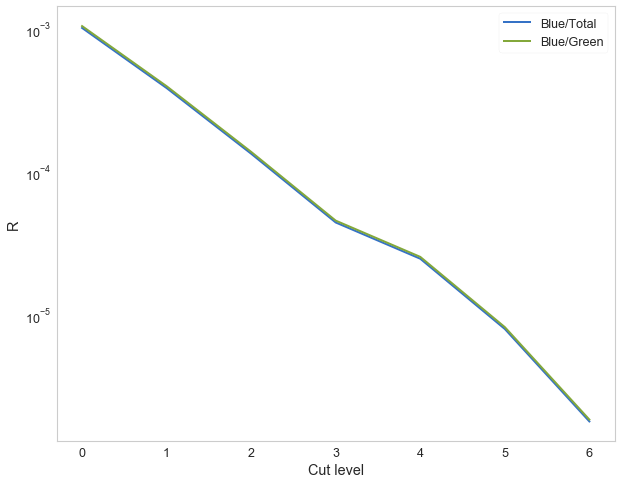

In [49]:
plot_tom_ratios((rdBTALI, rdBGALI), labels=('Blue/Total','Blue/Green'), log=True)

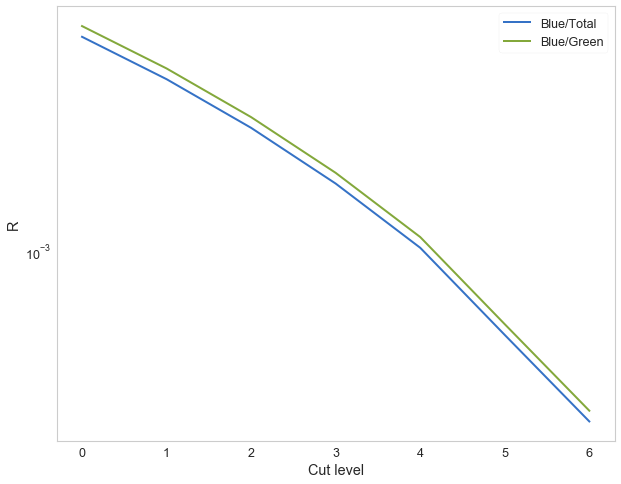

In [53]:
plot_tom_ratios((rdBT10, rdBG10), labels=('Blue/Total','Blue/Green'), log=True)

#### Relative Ba abundance ALI/SS10

In [98]:
relAb = rBGALI/ rBG10

In [99]:
drelAb = relAb * np.sqrt((srBGALI/rBGALI)**2 + (srBG10/rBG10)**2 )

In [100]:
print(f' Ratio BG ALIBa / BG SS10, cut=4 = {relAb} +- {drelAb}')

 Ratio BG ALIBa / BG SS10, cut=4 = 0.04071447281225521 +- 0.0031992513323106453


#### Absolute intensity ratio ALI/SS10

In [43]:
rBG10

0.001116997331103894

In [42]:
tom_ratio_with_error(tomFbiBanda420SS10, tomFbiBanda420ALIBa, bcut=4)

(0.03454480028787334, 0.0035860944261279976)

In [40]:
nc_ALI = relAb*7.6e14
unc_ALI = drelAb*7.6e14
print('Extrapolated number of chelated FBI in ALI04: %.2e ± %.2e'%(nc_ALI, unc_ALI))

Extrapolated number of chelated FBI in ALI04: 3.29e+13 ± 2.58e+12


#### Compare to predicted amount by leak rate

In [41]:
predNc = 5.43e14
upredNc = 0.06e14
overestim = predNc/nc_ALI
uoverestim = overestim * np.sqrt((upredNc/predNc)**2 + (unc_ALI/nc_ALI)**2)
print('Overestimation factor: %.2e ± %.2e' %(overestim, uoverestim))

Overestimation factor: 1.65e+01 ± 1.31e+00


### Ratios Green/Green

In [39]:
rdGGALI = tom_ratio(tomFbiAlta450, tomFbiAlta450ALIBa, bcut=6)
print(f' Green/Green for SFpA/SFpB = {rdGGALI}')

 Green/Green for SFpA/SFpB = {0: 2.8712197817881466, 1: 2.8712182634757815, 2: 2.871217872412788, 3: 2.8713338232703904, 4: 2.871630548679555, 5: 2.872631351055708, 6: 2.874656417158042}


In [40]:
rdGG10 = tom_ratio(tomFbiAlta450, tomFbiAlta450SS10, bcut=10)
print(f' Green/Green for SFpA/SFpB = {rdGG10}')

 Green/Green for SFpA/SFpB = {0: 1.8887198501122033, 1: 1.8887198501122033, 2: 1.888725585463026, 3: 1.8888288277344865, 4: 1.889109933332321, 5: 1.889916933489819, 6: 1.891679877735832, 7: 1.8947094254613803, 8: 1.8991855420546264, 9: 1.905778904096576, 10: 1.9146059666521444}


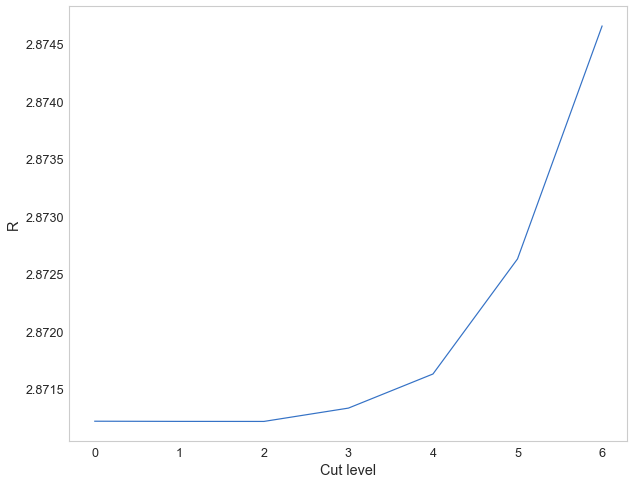

In [41]:
plot_tom_ratio(rdGGALI, log=False)

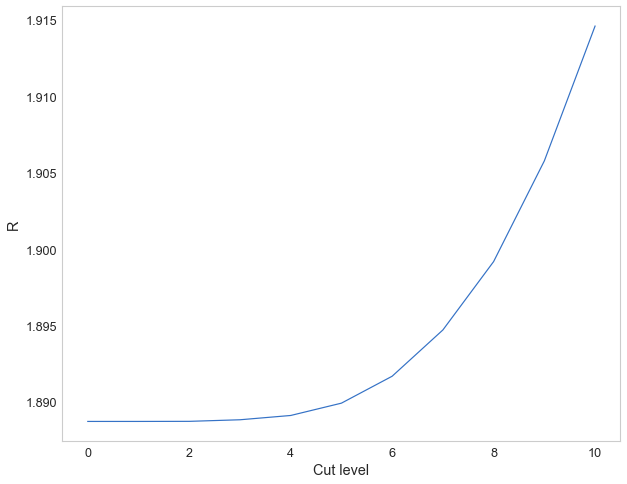

In [42]:
plot_tom_ratio(rdGG10, log=False)

### Ratios Green/Total

In [43]:
rdGTALI = tom_ratio(tomFbiTotALIBa, tomFbiAlta450ALIBa, bcut=6)
print(f' Ratio Green/Total ALIBa: = {rdGTALI}')

 Ratio Green/Total ALIBa: = {0: 0.9707563163251032, 1: 0.9707558029853275, 2: 0.9707537195996664, 3: 0.9707435968250807, 4: 0.9707183851990266, 5: 0.9706861920927158, 6: 0.9705824590948824}


In [44]:
rdGT10 = tom_ratio(tomFbiTotSS10, tomFbiAlta450SS10, bcut=6)
print(f' Ratio Green/Total SS10: = {rdBG10}')

 Ratio Green/Total SS10: = {0: 0.0065978809608025985, 1: 0.0046179137592848645, 2: 0.003065613042220007, 3: 0.0019176661628991286, 4: 0.001116997331103894, 5: 0.0005361919518954626, 6: 0.00025885191138421863}


In [45]:
rGTALI,srGTALI = tom_ratio_with_error(tomFbiTotALIBa, tomFbiAlta450ALIBa, bcut=4)
print(f' Ratio Blue/Green ALIBa, cut=4 = {rGTALI} +- {srGTALI}')

 Ratio Blue/Green ALIBa, cut=4 = 0.9707183851990266 +- 0.0007007315423491884


In [46]:
rGT10,srGT10 = tom_ratio_with_error(tomFbiTotSS10, tomFbiAlta450SS10, bcut=3)
print(f' Ratio Blue/Green SS10, cut=4 = {rGT10} +- {srGT10}')

 Ratio Blue/Green SS10, cut=4 = 0.9136674055565104 +- 0.0008013147856148664


## Signal - Background: ALI04-FBIref band 420 nm

In [170]:
from copy import deepcopy
dfA = deepcopy(tomFbiBanda420)
dfB = deepcopy(tomFbiBanda420ALIBa)

#### Transofrm str name of columns to number for better handle

In [178]:
dfA.columns = range(len(dfA.columns))
dfB.columns = range(len(dfB.columns))

dfA.columns, dfB.columns

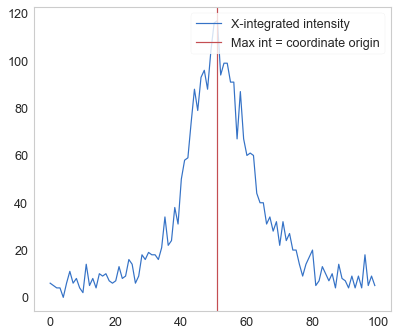

In [187]:
dfA.sum(axis=0).plot(label='X-integrated intensity')
zmaxA = dfA.sum(axis=0).idxmax()
plt.gca().axvline(zmaxA, color='r', label='Max int = coordinate origin')
plt.legend()

In [45]:
def plot_TOM(tom, vmin = 0, interpolation='spline36', cmap='viridis', figsize=(18,12)):
    norm = cmp.colors.Normalize(vmax=tom.max().max(), vmin=vmin)
    fig = plt.figure(figsize=figsize)
    ax      = fig.add_subplot(1, 1, 1)
    if interpolation:
        plt.imshow(tom.values.T, norm=norm, interpolation='spline36', cmap=cmap)
    else:
        plt.imshow(tom.values.T, norm=norm,  cmap=cmap)
    plt.xlabel('X scan')
    plt.ylabel('Z scan')

### Define origin of coordinates as the pellet center, where the intensity is most intense 

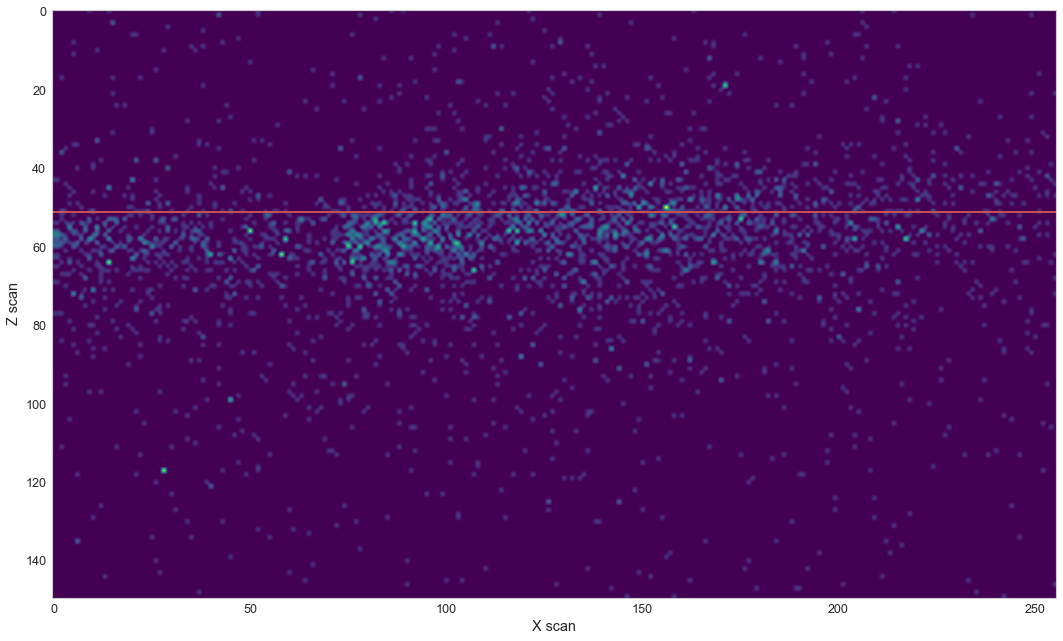

In [195]:
zmaxA = dfA.sum(axis=0).idxmax()
zmaxB = dfB.sum(axis=0).idxmax()

plot_TOM(tomFbiBanda420ALIBa)
plt.gca().axhline(y=zmaxA, color='r', lw=2)

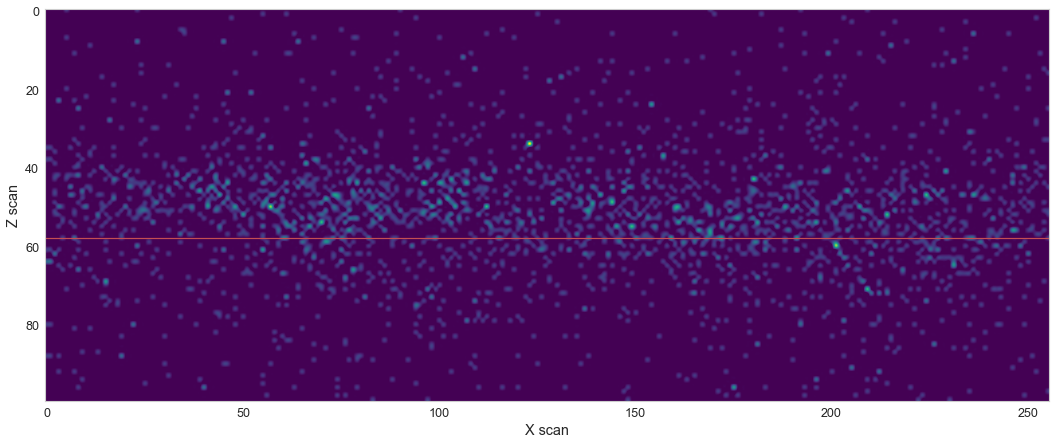

In [196]:
plot_TOM(tomFbiBanda420)
plt.gca().axhline(y=zmaxB, color='r')

### Shift the two origins to make them coincide

#### Customize axes

In [199]:
dfA.columns.shape, dfB.columns.shape

((100,), (150,))

In [198]:
zmaxA, zmaxB

(51, 58)

In [197]:
sizeAy = len(dfA.columns)
startA = - sizeAy/2 + (sizeAy/2 - zmaxA)
xx = np.linspace(startA, sizeAy + startA, num=sizeAy, dtype=int)
yy = np.arange(len(dfA))
y, x = np.meshgrid(xx, yy)

In [200]:
sizeBy = len(dfB.columns)
startB = - sizeBy/2 + (sizeBy/2 - zmaxB)
xxb = np.linspace(startB, sizeBy + startB, num=sizeBy, dtype=int)
yyb = np.arange(len(dfB))

yb, xb = np.meshgrid(xxb, yyb)

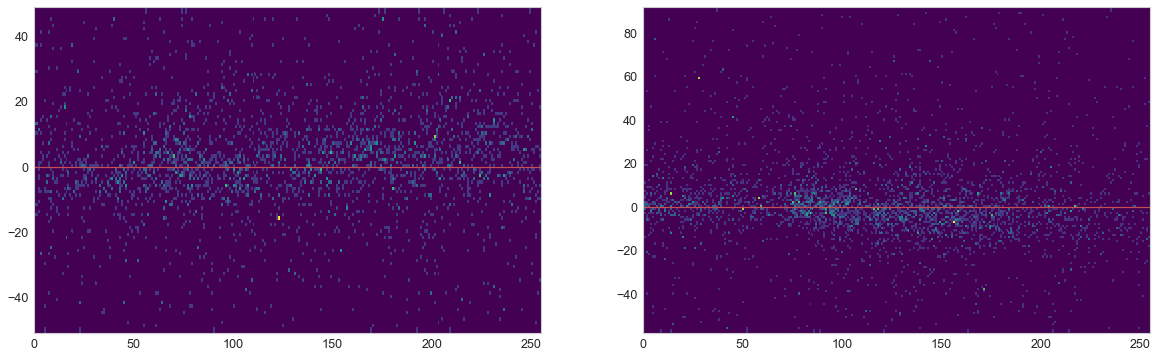

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].pcolor(x, y, dfA)
ax[1].pcolor(xb, yb, dfB)

# zmaxA = float(dfB.sum(axis=0).idxmax().replace(',','.')) / 2
ax[0].axhline(y=0, color='r')
ax[1].axhline(y=0, color='r')


#### Shift both dfs to origin in max Z intensity
by asigning dfAB.columns to the custom x axis

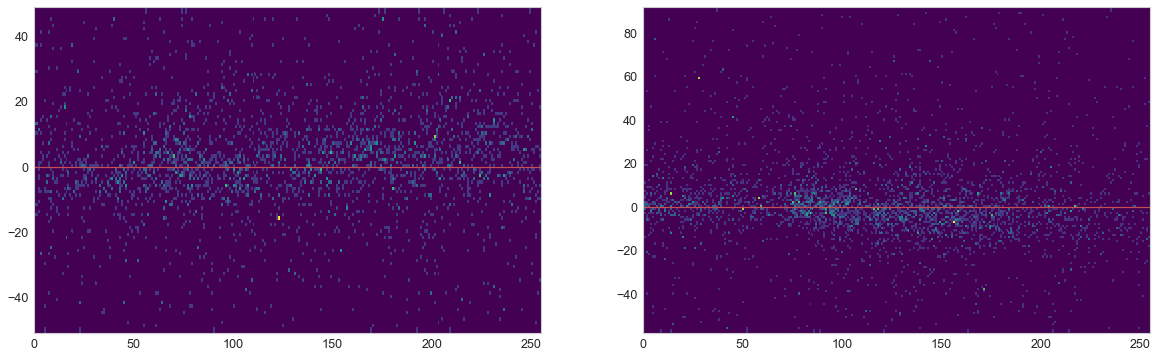

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

dfA.columns = xx
dfB.columns = xxb
ax[0].pcolor(x, y, dfA)
ax[1].pcolor(xb, yb, dfB)

# zmaxA = float(dfB.sum(axis=0).idxmax().replace(',','.')) / 2
ax[0].axhline(y=0, color='r')
ax[1].axhline(y=0, color='r')


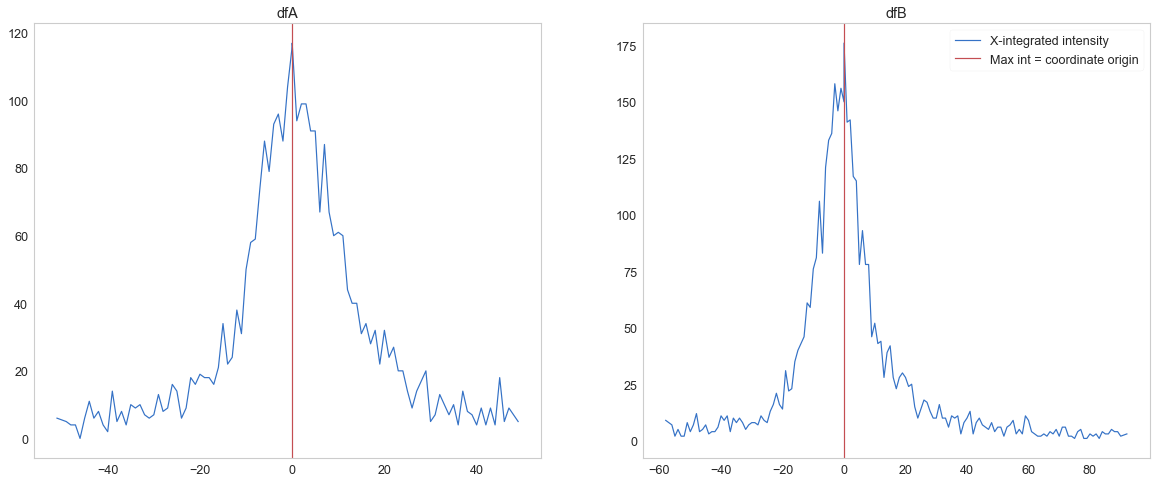

In [204]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
dfA.sum(axis=0).plot(ax=ax[0], label='X-integrated intensity')
zmaxA = dfA.sum(axis=0).idxmax()
ax[0].axvline(zmaxA, color='r', label='Max int = coordinate origin')
ax[0].set_title('dfA')

dfB.sum(axis=0).plot(ax=ax[1], label='X-integrated intensity')
zmaxB = dfB.sum(axis=0).idxmax()
ax[1].axvline(zmaxB, color='r', label='Max int = coordinate origin')
ax[1].set_title('dfB')
plt.legend()

### Perform subtraction of aligned dfs

In [119]:
dfA.columns[:10], dfB.columns[:10]

(Int64Index([-58, -56, -55, -54, -53, -52, -51, -50, -49, -48], dtype='int64'),
 Int64Index([-51, -49, -48, -47, -46, -45, -44, -43, -42, -41], dtype='int64'))

In [111]:
dfA.columns.shape, dfB.columns.shape

((100,), (150,))

In [205]:
diff = dfB.subtract(dfA)
diff.columns.shape

(152,)

In [206]:
diff.columns, startB

(Int64Index([-58, -56, -55, -54, -53, -52, -51, -50, -49, -48,
             ...
              82,  83,  84,  85,  86,  87,  88,  89,  90,  92],
            dtype='int64', length=152), -58.0)

#### Diff columns are the union of both dfA and dfB columns, so drop the excess ones (empty anyway)

In [207]:
for col in diff.columns[-2:]:
    diff.drop(col, axis=1, inplace=True)

### Plot result, should oscillate around zero

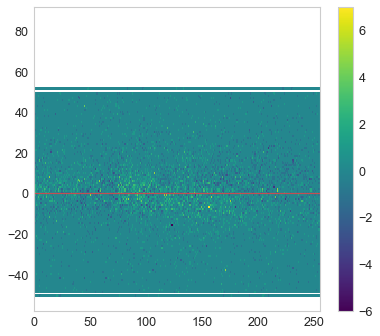

In [208]:
plt.pcolor(xb, yb, diff)
plt.axhline(y=0, color='r')

plt.colorbar()

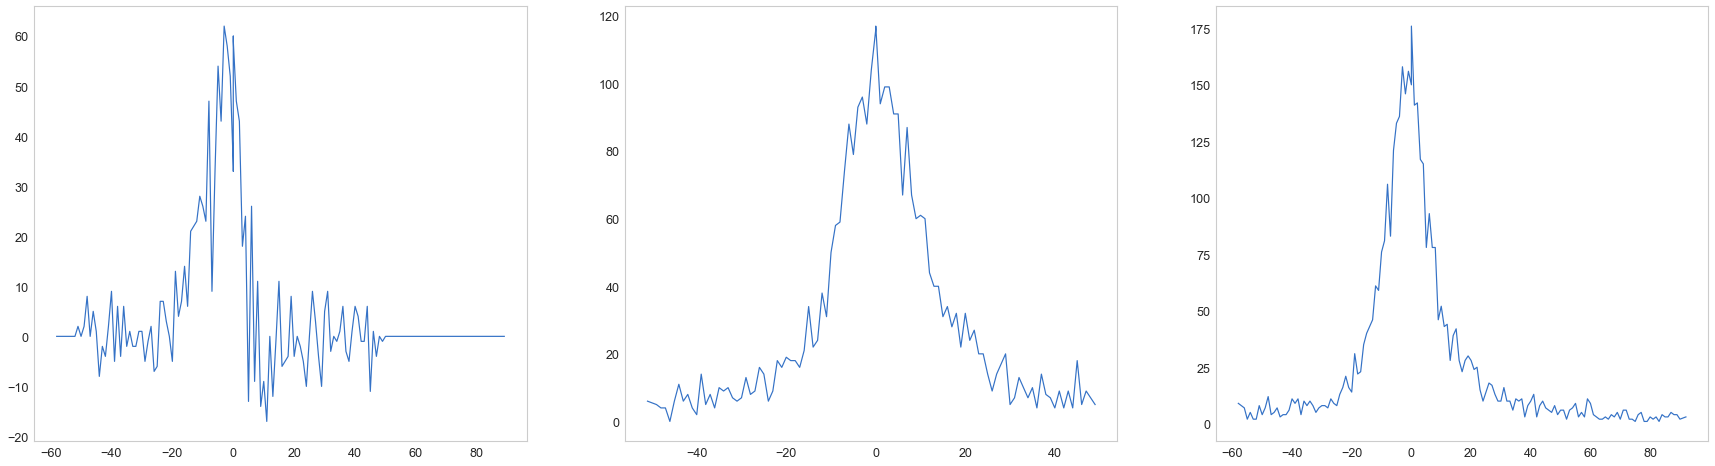

In [209]:
fig, ax = plt.subplots(1,3, figsize=(30, 8))
diff.sum(axis=0).plot(ax=ax[0])
dfA.sum(axis=0).plot(ax=ax[1])
dfB.sum(axis=0).plot(ax=ax[2])

In [23]:
## Signal - Background: ALI04-FBIref band 420 nm

from copy import deepcopy

def test_subtract_aligned_images(dfA : pd.DataFrame, dfB: pd.DataFrame, DEBUG: bool = False)->pd.DataFrame:
    #### Transform str name of columns to number for better handle
    dfA.columns = range(len(dfA.columns))
    dfB.columns = range(len(dfB.columns))

    zmaxA = plot_integrated_TOM(dfA)
    zmaxB = plot_integrated_TOM(dfB)
    
    fig, ax = plt.subplots(2, 2, figsize=(20, 6))
    
    ### Shift the two origins to make them coincide
    if DEBUG: 
        dfAc = center_TOM(dfA, inplace=False)
        dfBc = center_TOM(dfB, inplace=False) 
        pcolor_TOM(dfAc, ax=ax[0][0])
        pcolor_TOM(dfBc, ax=ax[1][0])
        
        # Show integrated profiles again
        zmaxA = plot_integrated_TOM(dfAc, ax=ax[0][1])
        zmaxB = plot_integrated_TOM(dfBc, ax=ax[1][1])
        diff = dfBc.subtract(dfAc)
    else:
        center_TOM(dfA, zmax=zmaxA, inplace=True)
        center_TOM(dfB, zmax=zmaxB, inplace=True)
        pcolor_TOM(dfA, ax=ax[0][0])
        pcolor_TOM(dfB, ax=ax[1][0])
        ax[0][0].set_title('Centered dfA')
        ax[1][0].set_title('Centered dfB')
        
        _ = plot_integrated_TOM(dfA, ax=ax[0][1])
        _ = plot_integrated_TOM(dfB, ax=ax[1][1])
        diff = dfB.subtract(dfA)
        
    # Since the original x axes weren't aligned, there will be excess columns in diff
    # Drop them inplace
#     drop_excess_columns(diff, dfA, dfB)
    diff.dropna(axis=1, inplace=True)
    
    fig, ax2 = plt.subplots(1, 2, figsize=(20, 8))
    zmaxD = plot_integrated_TOM(diff, ax=ax2[0])
    center_TOM(diff, zmaxD);
    pcolor_TOM(diff, ax=ax2[1])
    
    return diff

In [24]:
def plot_integrated_TOM(df : pd.DataFrame, ax = None) -> int:
    ### Define origin of coordinates as the pellet center, where the intensity is most intense 
    if ax == None: ax = plt.gca()
    df.sum(axis=0).plot(ax=ax, label='X-integrated intensity')
    zmax = df.sum(axis=0).idxmax()
    ax.axvline(zmax, color='r', label='Max int = coordinate origin')
    ax.legend()
    return zmax

def center_TOM(df: pd.DataFrame, zmax : int, inplace: bool = True):
   #### Shift both dfs to origin in max Z intensity
   # by asigning df.columns to the custom x axis
    sizey = len(df.columns)
    start = - sizey + (sizey - zmax)
    xx = np.linspace(start, sizey + start - 1, num=sizey, dtype=int)
    
    if inplace:
        df.columns = xx
    else:
        dfcentered = deepcopy(df)
        dfcentered.columns = xx
        return dfcentered

def pcolor_TOM(df: pd.DataFrame, ax = None):
    if ax == None: ax = plt.gca()
    x, y = np.meshgrid(df.index, df.columns)
    pcm = ax.pcolor(x, y, df.T)
#     ax.axhline(y=0, color='r')
    fig.colorbar(pcm, ax=ax)
    return ax

def drop_excess_columns(diff: pd.DataFrame, dfA : pd.DataFrame, dfB: pd.DataFrame):
    if len(dfB.columns) > len(dfA.columns):
        dropcols = diff.columns[-1] - dfB.columns[-1]

    elif len(dfB.columns) < len(dfA.columns):
        dropcols = diff.columns[-1] - dfA.columns[-1]
    else: pass
    print(dropcols)
    #### Diff columns are the union of both dfA and dfB columns, so drop the excess ones (empty anyway)

    for col in diff.columns[dropcols:]:
        diff.drop(col, axis=1, inplace=True)

In [25]:
def subtract_aligned_images(dfA : pd.DataFrame, dfB: pd.DataFrame, DEBUG: bool = False)->pd.DataFrame:
    #### Transform str name of columns to number for better handle
    dfA.columns = range(len(dfA.columns))
    dfB.columns = range(len(dfB.columns))

    zmaxA = dfA.sum(axis=0).idxmax()
    zmaxB = dfB.sum(axis=0).idxmax()
    
    ### Shift the two origins to make them coincide
    center_TOM(dfA, zmaxA, inplace=True)
    center_TOM(dfB, zmaxB, inplace=True) 
    diff = dfB.subtract(dfA)
    diff.dropna(axis=1, inplace=True)

    fig, ax2 = plt.subplots(1, 2, figsize=(20, 8))
    zmaxD = plot_integrated_TOM(diff, ax=ax2[0])
    center_TOM(diff, zmaxD);
    pcolor_TOM(diff, ax=ax2[1])
    
    return diff

In [41]:
dfA = deepcopy(tomFbiBanda420SS10)
dfB = deepcopy(tomFbiBanda420ALIBa)

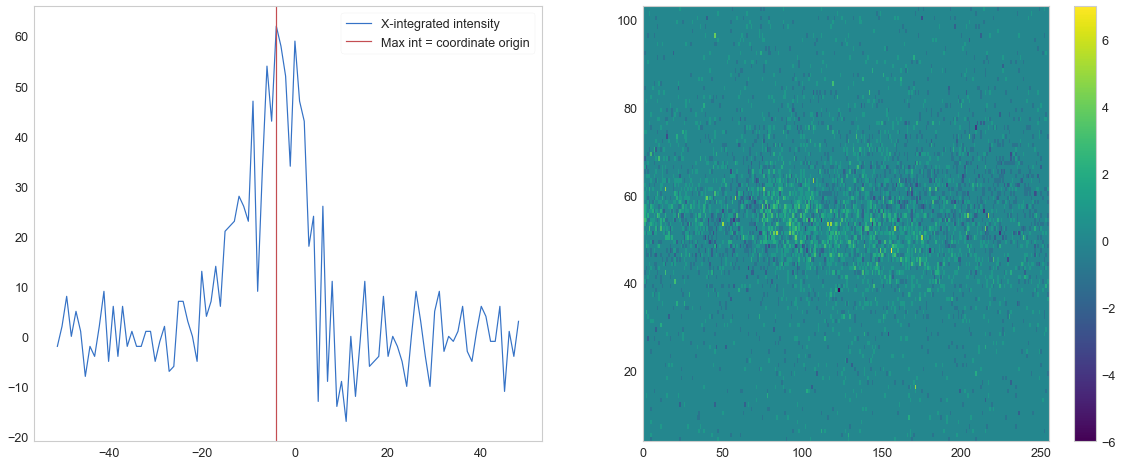

In [415]:
subtract_aligned_images(dfA, dfB);

### Histogram x-integrated TOM

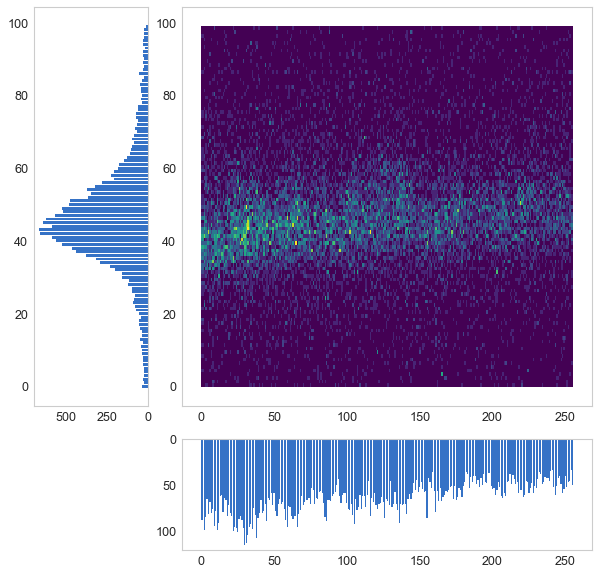

In [76]:
dfA.columns = range(len(dfA.columns))
fig = plt.figure(figsize=(10,10))
grid = plt.GridSpec(4,4, hspace=0.3, wspace=0.3)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1,0], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:], sharex=main_ax)

x, y = np.meshgrid(dfA.index, dfA.columns)
pcm = main_ax.pcolor(x, y, dfA.T)

xint = dfA.sum(axis=0)
y_hist.barh(xint.index, xint.values, label='X-integrated intensity', )
y_hist.invert_xaxis()

zint = dfA.sum(axis=1)
x_hist.bar(zint.index, zint.values)
x_hist.invert_yaxis()

plt.gcf().colorbar(pcm, ax=ax)

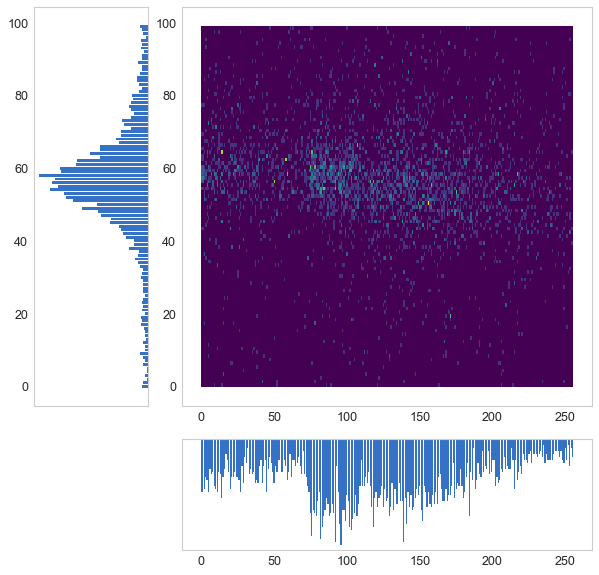

In [74]:
dfB.columns = range(len(dfB.columns))
fig = plt.figure(figsize=(10,10))
grid = plt.GridSpec(4,4, hspace=0.3, wspace=0.3)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1,0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:], yticklabels=[], sharex=main_ax)

x, y = np.meshgrid(dfB.index, dfB.columns)
pcm = main_ax.pcolor(x, y, dfB.T)

xint = dfB.sum(axis=0)
y_hist.barh(xint.index, xint.values, label='X-integrated intensity', )
y_hist.invert_xaxis()

zint = dfB.sum(axis=1)
x_hist.bar(zint.index, zint.values)
x_hist.invert_yaxis()

plt.gcf().colorbar(pcm, ax=ax)

In [73]:
dfB = dfB.iloc[:,:100]

## Number of molecules

- Define:
    - Nc as the number o chelated molecules and Lc the luminosity of the chelated molecules
    - Nu as the number of unchelated molecules and Lu as the luminosity of unchelated molecules.
    - Ib as the integrated signal in a band.
- Then:

$$I_b = I_b^c + I_b^u$$

$$I_b^{420} = \frac{N_c}{\epsilon_c^{420}} L_c + \frac{N_u}{\epsilon_u^{420}} L_u$$

$$I_b^{450} = \frac{N_c}{\epsilon_c^{450}} L_c + \frac{N_u}{\epsilon_u^{450}} L_u$$

- Then:

$$ N_c L_c = (I_b^{420} - \frac{N_u}{\epsilon_u^{420}} L_u) \epsilon_c^{420}$$

$$ I_b^{450}  = (I_b^{420} - \frac{N_u}{\epsilon_u^{420}} L_u) \frac{\epsilon_c^{420}}{\epsilon_c^{450}} + \frac{N_u}{\epsilon_u^{450}} L_u$$

- Define:
$$ \epsilon_r^c =\frac{\epsilon_c^{420}}{\epsilon_c^{450}}$$ 

- Then:

$$ I_b^{450}  = I_b^{420} \epsilon_r^c - \frac{N_u}{\epsilon_u^{420}} L_u \epsilon_r^c + \frac{N_u}{\epsilon_u^{450}} L_u$$

$$ I_b^{450}  = I_b^{420} \epsilon_r^c - N_u L_u (\frac{\epsilon_r^c}{\epsilon_u^{420}}  - \frac{1}{\epsilon_u^{450}} )$$

$$ N_u L_u (\frac{\epsilon_r^c}{\epsilon_u^{420}}  - \frac{1}{\epsilon_u^{450}} ) = I_b^{420} \epsilon_r^c - I_b^{450}$$


- Define:
$$\epsilon = (\frac{\epsilon_r^c}{\epsilon_u^{420}}- \frac{1}{\epsilon_u^{450}} )$$

Then:

$$ N_u L_u = \frac{1}{\epsilon} (I_b^{420} \epsilon_r^c - I_b^{450}) $$

In [68]:
def nu_lu(iB420, iB450, eC420, eC450, eU420, eU450):
    eR = eC420 / eC450
    print(f'eR = {eR}')
    eps = (eR /eU420 - 1 / eU450)
    print(f'eps = {eps}')
    print(f'iB420 * eR = {iB420 * eR}')
    print(f'iB450 = {iB450}')
    return (1/eps) * (iB420 * eR - iB450)

def nc_lc(iB420, eC420, eU420, nulu):
    eR = eC420 / eU420
    print(f'eR = {eR}')
    return iB420 * eC420 - nulu * eR

In [69]:
def nc_lc(iB420, eC420):
    return iB420 / eC420 

def nu_lu(iB420, iB450, eC420, eC450, eU450):
    eR = eC450 / eC420
    print(f'eR = {eR}')
    return (iB450 - eR * iB420) / eU450



In [1058]:
iB420  = tom_signal_above_bkg(tomFbiBanda420SS10, bmax=4)[2]
iB420 

4771.0

In [70]:
iB420  = tom_signal_above_bkg(tomFbiBanda420ALIBa, bmax=4)[2]
iB420 

520.0

In [1065]:

iB420  = tom_signal_above_bkg(tomFbiBanda420SS10, bmax=4)[2]
iB420 
iB450  = tom_signal_above_bkg(tomFbiAlta450SS10, bmax=4)[2]
iB450 

2487920.0

In [71]:
iB450  = tom_signal_above_bkg(tomFbiAlta450ALIBa, bmax=4)[2]
iB450 

3782106.0

In [73]:
eC420 = 0.2
eC450 = 0.37
eU420 = 0.005
eU450 = 0.98

In [1067]:
nulu = nu_lu(iB420, iB450, eC420, eC450, eU450)
print(f'NuLu = {nulu:.2e}')

eR = 1.8499999999999999
NuLu = 2.53e+06


In [74]:
nulu = nu_lu(iB420, iB450, eC420, eC450, eU450)
print(f'NuLu = {nulu:.2e}')

eR = 1.8499999999999999
NuLu = 3.86e+06


In [1068]:
nclc = nc_lc(iB420, eC420)
print(f'NcLc = {nclc:.2e}')

NcLc = 2.39e+04


In [75]:
nclc = nc_lc(iB420, eC420)
print(f'NcLc = {nclc:.2e}')

NcLc = 2.60e+03


In [78]:
Dr = 310

In [81]:
R = (nulu/nclc) 
print(f'R = {R:.2e} ')

R = 3.21e+01 


In [76]:
R = (nulu/nclc) 
print(f'R = {R:.2e} ')

R = 1.48e+03 


In [82]:
Nu = (nulu/nclc) * Dr
print(f'Nu = {Nu:.2e} * Nc')

Nu = 9.97e+03 * Nc


In [79]:
Nu = (nulu/nclc) * Dr
print(f'Nu = {Nu:.2e} * Nc')

Nu = 4.60e+05 * Nc


# SS9

In [52]:
tomFbiAltaSS9450 = read_TOM(ipath, name='TOMO_SS9_800nm_100mW_S2_1mic_Alta450nm.xls')
tomFbiBanda420SS9 = read_TOM(ipath, name='TOMO_SS9_800nm_100mW_S2_1mic_Banda420nm.xls')
tomFbiBanda430SS9 = read_TOM(ipath, name='TOMO_SS9_800nm_100mW_S2_1mic_Banda430nm.xls')

In [69]:
iB420  = tom_signal_above_bkg(tomFbiBanda420SS9, bmax=4)[2]
iB420 

1742.0

In [70]:
iB450  = tom_signal_above_bkg(tomFbiAltaSS9450, bmax=4)[2]
iB450 

277627.0

In [76]:
nulu = nu_lu(iB420, iB450, eC420, eC450, eU450)
print(f'NuLu = {nulu:.2e}')

eR = 1.8499999999999999
NuLu = 2.80e+05


In [77]:
nclc = nc_lc(iB420, eC420)
print(f'NcLc = {nclc:.2e}')

NcLc = 8.71e+03


In [82]:
Nu = (nulu/nclc) * Dr
print(f'Nu = {Nu:.2e} * Nc')

Nu = 9.97e+03 * Nc


## Plot TOMS

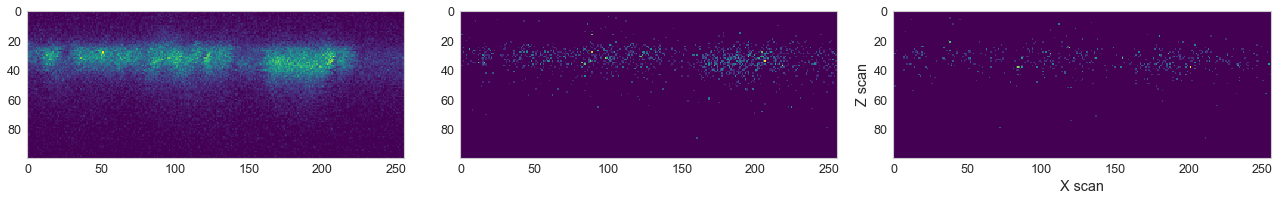

In [83]:
plot_TOMS((tomFbiAltaSS9450,tomFbiBanda430SS9,tomFbiBanda420SS9), xw=1, yw=3, 
          vmin=2, interpolation=False, cmap='viridis', figsize=(18,12))

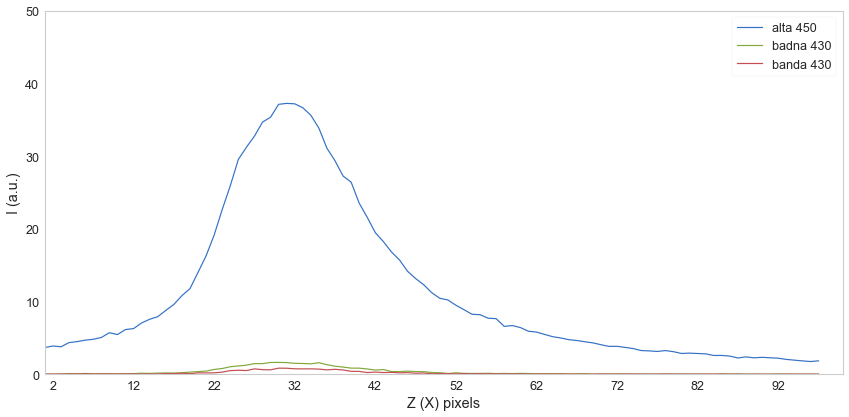

In [84]:
display_profiles((tomFbiAltaSS9450, tomFbiBanda430SS9, tomFbiBanda420SS9), cuts=(2,2,2), labels=('alta 450','badna 430','banda 430'),
                 zrange=(1,100), yrange=(0,50), xlsx=False, figsize=(12,6))

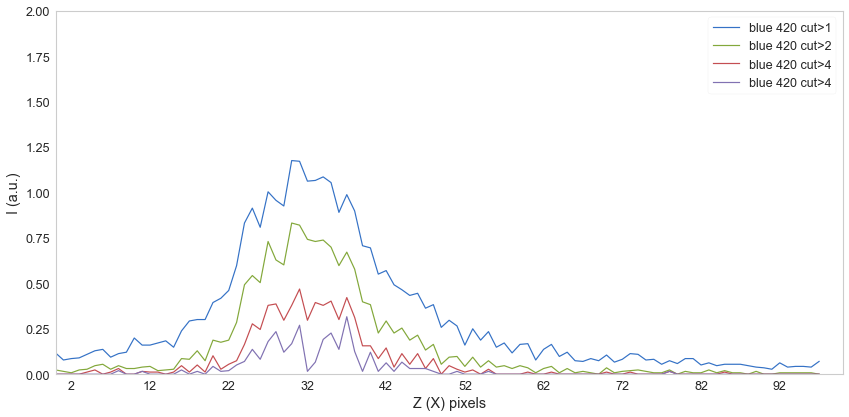

In [85]:
display_profiles((tomFbiBanda420SS9, tomFbiBanda420SS9, tomFbiBanda420SS9, tomFbiBanda420SS9), cuts=(1,2,3,4), labels=('blue 420 cut>1','blue 420 cut>2','blue 420 cut>4','blue 420 cut>4'),
                zrange=(0,100), yrange=(0,2), xlsx=False, figsize=(12,6))

In [53]:
rdBG9 = tom_ratio(tomFbiAltaSS9450, tomFbiBanda420SS9, bcut=6)
print(f' Blue/Green for SFpB = {rdBG9}')

 Blue/Green for SFpB = {0: 0.02724767833452393, 1: 0.01382206219219889, 2: 0.006274605856058668, 3: 0.00284313107686833, 4: 0.0011003040212853238, 5: 0.00042629142397271737, 6: 0.00021982397491518112}


In [54]:
rBG9,srBG9 = tom_ratio_with_error(tomFbiAltaSS9450, tomFbiBanda420SS9, bcut=4)
print(f' Ratio Blue/Green SS10, cut=4 = {rBG9} +- {srBG9}')

 Ratio Blue/Green SS10, cut=4 = 0.0011003040212853238 +- 6.498461472056032e-05


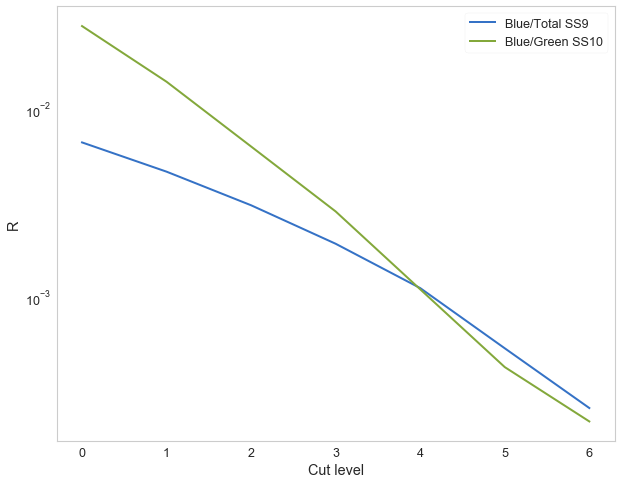

In [88]:
plot_tom_ratios((rdBG10, rdBG9), labels=('Blue/Total SS9','Blue/Green SS10'), log=True)

In [89]:
rdGG9 = tom_ratio(tomFbiAlta450, tomFbiAltaSS9450, bcut=10)
print(f' Green/Green for SFpA/SFpB = {rdGG9}')

 Green/Green for SFpA/SFpB = {0: 0.21573017159966354, 1: 0.21442138634065463, 2: 0.21076289354776018, 3: 0.20481165766761616, 4: 0.19805691810050266, 5: 0.19067087506599362, 6: 0.18332173800644017, 7: 0.17663858237673363, 8: 0.1704147712395349, 9: 0.16430890484734176, 10: 0.15967929898995809}


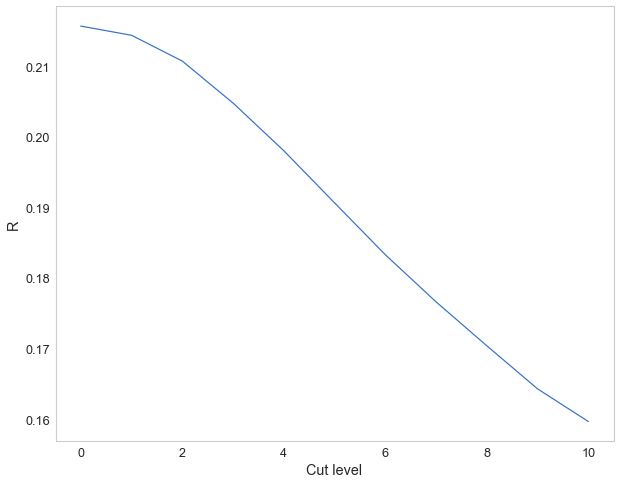

In [90]:
plot_tom_ratio(rdGG9, log=False)

#### The ratios cut at 4 (background level) suggesting that there is no more signal in the S10 than in the S9

In [1012]:
def error_ratio(a, b, sa, sb):
    sx2 = (1 / b**2) * (sa**2 + (a/b)**2 * sb**2)
    return np.sqrt(sx2)

def dict_ratio_with_error(d1, d2, sd1, sd2, bcut=4):

    a = d1[bcut]
    b = d2[bcut]
    r = a/b
    print(a,b,r)
    return r, error_ratio(a, b, sd1, sd2)


# Double ratios

### S9

In [55]:
dr9 = dict_ratio(rdBG9,rdBG)
dr9

{0: 11.948088808757761,
 1: 20.480471391224267,
 2: 38.08853462986898,
 3: 72.0173849866369,
 4: 90.56739937202161,
 5: 93.52940414817412,
 6: 1000000000.0}

In [56]:
dict_ratio_with_error(rdBG9,rdBG, sd1 = 6.498461472056032e-05, sd2 = 2.6364859332489068e-06, bcut=3)

0.00284313107686833 3.947839924201474e-05 72.0173849866369


(72.0173849866369, 5.083426660408329)

In [1091]:
310 * 90

27900

### S10

In [57]:
dr10 = dict_ratio(rdBG10,rdBG)
dr10

{0: 2.8931664085816062,
 1: 6.842470343358275,
 2: 18.60909054671991,
 3: 48.57507395736197,
 4: 91.9414465698254,
 5: 117.64185472574425,
 6: 1000000000.0}

In [58]:
dr10 = dict_ratio(rdBGALI,rdBG)
dr10

{0: 0.45645613540242747,
 1: 0.5860890733038423,
 2: 0.8345982334115213,
 3: 1.1519706558970957,
 4: 2.0894052693369436,
 5: 1.7985832622650617,
 6: 1000000000.0}

In [131]:
dict_ratio_with_error(rdGT10,rdGT, sd1 = 6.498461472056032e-05, sd2 = 2.6364859332489068e-06, bcut=4)

0.9136674055565104 0.8680452339506413 1.0525573666227437


(1.0525573666227437, 7.49313941715746e-05)

In [132]:
dict_ratio_with_error(rdBT10,rdBT, sd1 = 6.498461472056032e-05, sd2 = 2.6364859332489068e-06, bcut=4)

0.0010205640535232412 1.054588812526406e-05 96.7736468850211


(96.7736468850211, 24.965948474149037)

In [83]:
Sr, uSr = dict_ratio_with_error(rdBG10,rdBG, sd1 = 6.498461472056032e-05, sd2 = 2.6364859332489068e-06, bcut=4)
Sr, uSr

0.001116997331103894 1.2149007577943476e-05 91.9414465698254


(91.9414465698254, 20.65699011214893)

In [87]:
Nc = Sr/F * Nu
print(f'number chelated = {Nc:.2e}')

number chelated = 1.47e+15


##### What is sd1, sd2?

In [127]:
print(f'ALI Blue/total: {rBTALI:.2e}')
print(f'ALI Green/total: {rGTALI:.2e}')

print(f'Control Blue/total: {rBT:.2e}')
print(f'Control green/total: {rGT:.2e}')

ALI Blue/total: 4.41e-05
ALI Green/total: 9.71e-01
Control Blue/total: 1.05e-05
Control green/total: 8.68e-01


In [126]:
print(f'SS10 Blue/total: {rBT10:.2e}')
print(f'SS10 Green/total: {rGT10:.2e}')

print(f'Control Blue/total: {rBT:.2e}')
print(f'Control green/total: {rGT:.2e}')

SS10 Blue/total: 1.02e-03
SS10 Green/total: 9.14e-01
Control Blue/total: 1.05e-05
Control green/total: 8.68e-01


#### ALI

In [59]:
dict_ratio_with_error(rdBTALI,rdBT, sd1 = 6.498461472056032e-05, sd2 = 2.6364859332489068e-06, bcut=4)

2.4640910070945288e-05 1.054588812526406e-05 2.3365419562829186


(2.3365419562829186, 6.189705779446091)

In [60]:
dict_ratio_with_error(rdBGALI,rdBG, sd1 = 6.498461472056032e-05, sd2 = 2.6364859332489068e-06, bcut=4)

2.5384200450569557e-05 1.2149007577943476e-05 2.0894052693369436


(2.0894052693369436, 5.368148765984432)

In [88]:
Sr, uSr = dict_ratio_with_error(rdBGALI,rdBG, sd1 = 6.498461472056032e-05, sd2 = 2.6364859332489068e-06, bcut=3)
Sr, uSr

4.5477957468591125e-05 3.947839924201474e-05 1.1519706558970957


(1.1519706558970957, 1.6478770735965895)

#### ALI nr of molecules

In [95]:
Nc = Sr/F * n_fbi_pill04
print(f'number chelated = {Nc:.2e}')

number chelated = 1.42e+13


##### From comparison with SFpB

In [108]:
nc_ALI = relAb*7.6e14
unc_ALI = drelAb*7.6e14
print('Extrapolated number of chelated FBI in ALI04: %.2e ± %.2e'%(nc_ALI, unc_ALI))

Extrapolated number of chelated FBI in ALI04: 3.09e+13 ± 2.43e+12


#### Compare to predicted amount by leak rate

In [102]:
predNc = 5.43e14
upredNc = 0.06e14
overestim = predNc/Nc
uoverestim = overestim * np.sqrt((upredNc/predNc)**2 + (unc_ALI/nc_ALI)**2)
print('Overestimation factor: %.2e ± %.2e' %(overestim, uoverestim))

Overestimation factor: 3.83e+01 ± 3.04e+00


In [109]:
predNc = 5.43e14
upredNc = 0.06e14
overestim = predNc/nc_ALI
uoverestim = overestim * np.sqrt((upredNc/predNc)**2 + (unc_ALI/nc_ALI)**2)
print('Overestimation factor: %.2e ± %.2e' %(overestim, uoverestim))

Overestimation factor: 1.75e+01 ± 1.39e+00


In [106]:
n_fbi_pill, n_fbi_pill04

(4.83e+17, 3.68736e+17)

In [107]:
relAb

0.04071447281225521

### Setting the cut at 4 yields the same double ratio for SS9 and SS10

## Data

In [80]:
F = 3E+4              #theoretical value of 
Nu = 4.8E+17          # number of FBI molecules in Pills (control and depositions)
Nc = 7.6E+14          # number of Ba++ in SS9
R = Nu / (Nc *F)
Rn = Nu / Nc
print(f'number unchelated = {Nu:.2e}, number chelated = {Nc:.2e}, F = {F:.2e}, ')
print(f'Ratio chelated / unchelated  = {Rn:.2e}')
print(f'Ratio emitted light: chelated / unchelated  = {R:.2e}')

number unchelated = 4.80e+17, number chelated = 7.60e+14, F = 3.00e+04, 
Ratio chelated / unchelated  = 6.32e+02
Ratio emitted light: chelated / unchelated  = 2.11e-02


In [62]:
F = 3E+4              #theoretical value of 
Nu = 4.8E+17          # number of FBI molecules in Pills (control and depositions)
Nc = 7.6E+14          # number of Ba++ in SS9
R = Nu / (Nc *F)
Rn = Nu / Nc
print(f'number unchelated = {Nu:.2e}, number chelated = {Nc:.2e}, F = {F:.2e}, ')
print(f'Ratio chelated / unchelated  = {Rn:.2e}')
print(f'Ratio emitted light: chelated / unchelated  = {R:.2e}')

number unchelated = 4.80e+17, number chelated = 7.60e+14, F = 3.00e+04, 
Ratio chelated / unchelated  = 6.32e+02
Ratio emitted light: chelated / unchelated  = 2.11e-02


## Calculation
- Pill A is the control, contains only unchelated molecules, Nu.
- Pill B is the pill after sublimation of SS9, contains Nc chelated molecules and Nu - Nc ~sim Nc unchelated molecules.
- The laser scan is not shining in the same spot for Pill A and Pill B, and thus the amount of molecules (chelated and unchelated) illuminated by the spot is different. This is clearly seen in the profiles. 
- Define nuA, ncA as the number of unchelated and chelated molecules in pill A and nuB, ncB as the number of unchelated and chelated molecules in pill B, **in the spot illuminated by the laser**. Then $nuA \ne nuB$ and $ncA \ne ncB$
- We can make the hypothesis that the chelation was uniform. Then the ratio $ncB/nuB$ measured by the laser in the spot is the same in all the sample. 
- By definition $F = Cr \times Dr$, where:
- Cr is the ratio of concentrations, or equivalently the ratio NA/NB, where NA is the total number of molecules in pill A and NB is the total number of molecules in pill B, {\bf illuminated by the laser}. We don't know this number. Instead we know the total light emitted by the illuminated spot in pill A and in pill B (actually for SS9 we only know the blue and green light emitted by the spot, but we know that the ratio green to total is 90 %). The total light contains the contribution of the unchelated and chelated molecules, weighted by F, so we cannot disentangle one number from the other.
- Dr is the ratio between the blue light and the total light (we can approximate blue to green). 
- The ratio blue to green is rBG9 after sublimation SS9 and rBG10 B after sublimation SS10. This ratio is the same for $bcut =4$ (above the level of background), and appears to be a robust estimation of Dr, but needs to be "normalised to unity". For this we use the double ratio blue to green SS9 (SS10) /NORM. This corresponds to the double ratios dr9 and dr10 which are both near 100. 
- if we make the hypothesis that $C_r = Nu / Nc$, then
$ F = (Nu/Nc) dr9$

In [63]:
F = (Nu/Nc) * dr9[4]
print(f'F = {F:.2e}')

F = 5.72e+04


#### The situation is different for SS10 where NBa = 7.2E+15, but we have no evidence that the extra molecules did chelate more FBI molecules. Recall that SS9 is the only pill with a full blue picture. 

### Scanned region: 30 x 250 microns

In [92]:
n_fbi_pill = n_m(mmolMgr= 2.3E-5, mgr = 35)
n_fbi_pill

4.83e+17

In [94]:
n_fbi_pill04 = n_m(mmolMgr= 2.3E-5, mgr = 26.72)
n_fbi_pill04

3.68736e+17

In [646]:
n_fbi_c = n_fbi_pill * r9B20A[4]
print(f'{n_fbi_c:.2e}')

5.31e+14


In [67]:
mba, nba = subl_nba(d_pel = 1.3 * cm, thick = 1 * nm)

Total number of Barium perchlorate molecules deposited =7.61e+14


# Silice Background

In [898]:
ipath = os.path.join(path, 'PastillasTPA')
print(ipath)

/Users/jjgomezcadenas/Projects/Development/data/PastillasTPA


In [899]:
TOM = get_TOM_files(ipath, ext='xls')

In [904]:
a650mWdfAlta450 = select_df_TOM(TOM, sample='A', energy='650mW', filter='Alta450nm')
a650mWdfBaja450 = select_df_TOM(TOM, sample='A', energy='650mW', filter='Baja450nm')
a650mWdfBanda420 = select_df_TOM(TOM, sample='A', energy='650mW', filter='Banda420nm')
a650mWdfBanda430 = select_df_TOM(TOM, sample='A', energy='650mW', filter='Banda430nm')
print(f'TER = {total_energy_ratio_dfs(a650mWdfAlta450,(a650mWdfBaja450, a650mWdfBanda420, a650mWdfBanda430))}')
print(f'PER = {peak_energy_ratio_dfs(a650mWdfAlta450,(a650mWdfBaja450, a650mWdfBanda420, a650mWdfBanda430))}')
a650Tot = a650mWdfAlta450  + a650mWdfBaja450

TER = [1.0381599950613365, 10.772144948755491, 41.6553432413305]
PER = [2.0214158239143365, 13.325490196078432, 32.67307692307692]


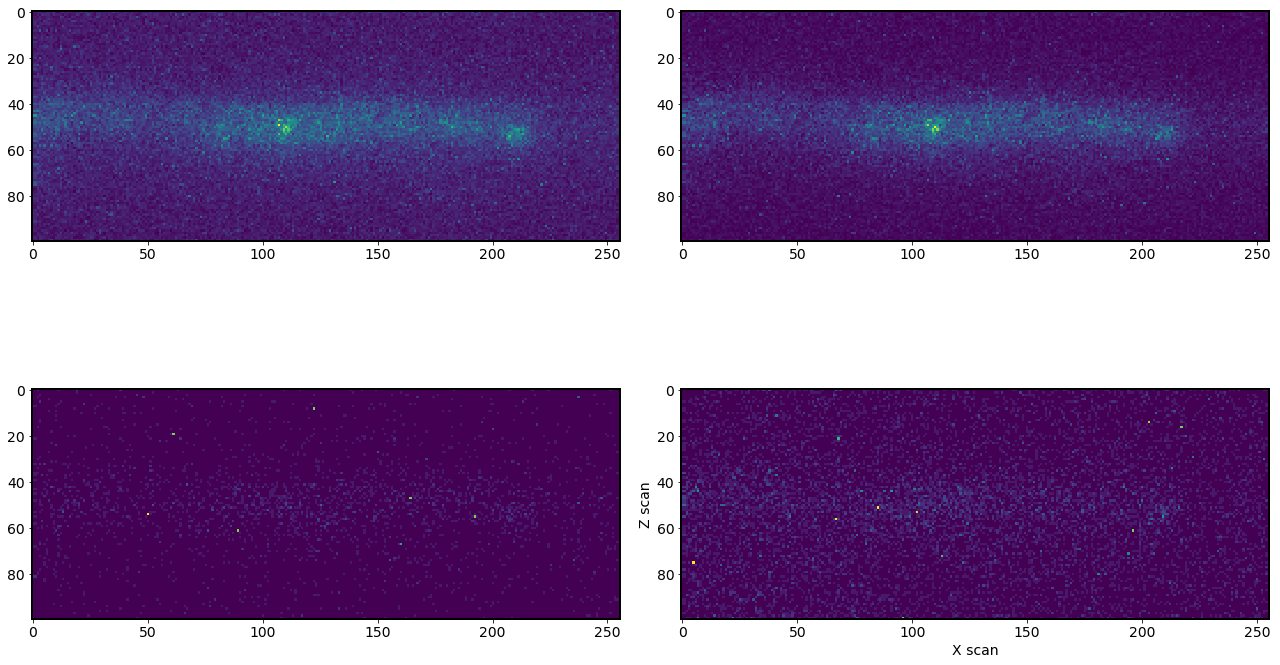

In [905]:
plot_TOMS((a650Tot,a650mWdfAlta450,a650mWdfBanda430,a650mWdfBanda420), xw=2, yw=2, 
          vmin=4, interpolation=False, cmap='viridis', figsize=(18,12))

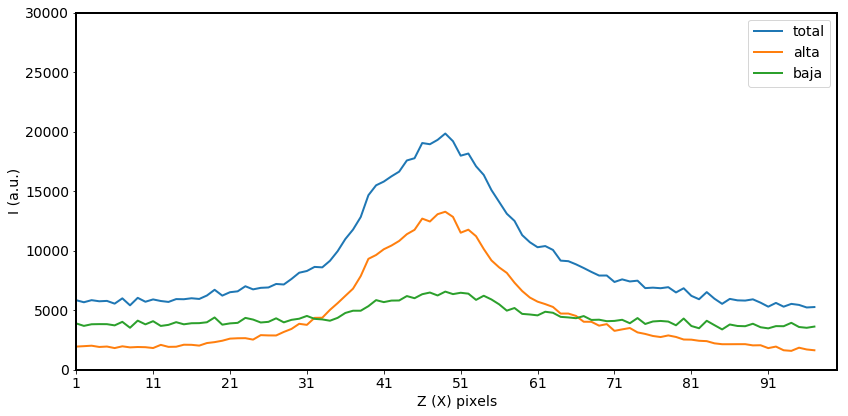

In [930]:
display_profiles((a650Tot, a650mWdfAlta450, a650mWdfBaja450), cuts=(2,2,2), labels=('total','alta','baja'),
                 zrange=(1,100), yrange=(0,30000), xlsx=False, figsize=(12,6))

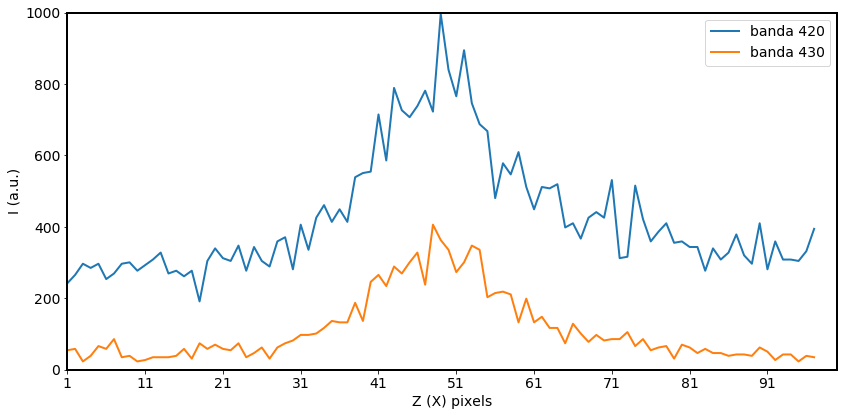

In [933]:
display_profiles((a650mWdfBanda420, a650mWdfBanda430), cuts=(2,2,2), labels=('banda 420','banda 430'),
                 zrange=(1,100), yrange=(0,1000), xlsx=False, figsize=(12,6))

In [934]:
scale = (650 / 100)**2
scale

42.25

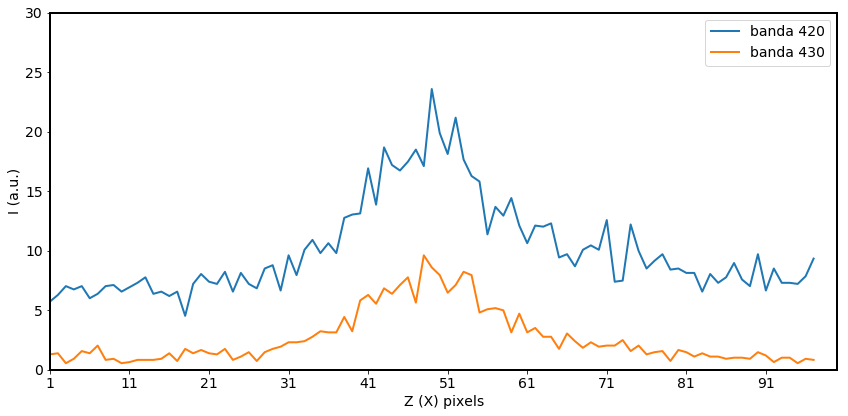

In [943]:
display_profiles((a650mWdfBanda420/scale, a650mWdfBanda430/scale), cuts=(5,5), labels=('banda 420','banda 430'),
                 zrange=(1,100), yrange=(0,30), xlsx=False, figsize=(12,6))

In [945]:
a420 = a650mWdfBanda420/scale

In [948]:
k30mWdfAlta450 = select_df_TOM(TOM, sample='K', energy='30mW', filter='Alta450nm')
k30mWdfBaja450 = select_df_TOM(TOM, sample='K', energy='30mW', filter='Baja450nm')
k30mWdfBanda420 = select_df_TOM(TOM, sample='K', energy='30mW', filter='Banda420nm')
k30mWdfBanda430 = select_df_TOM(TOM, sample='K', energy='30mW', filter='Banda430nm')
print(f'TER = {total_energy_ratio_dfs(k30mWdfAlta450,(k30mWdfBaja450, k30mWdfBanda420, k30mWdfBanda430))}')
print(f'PER = {peak_energy_ratio_dfs(k30mWdfAlta450,(k30mWdfBaja450, k30mWdfBanda420, k30mWdfBanda430))}')
k30 = k30mWdfAlta450 + k30mWdfBaja450

TER = [166.60028414355426, 14157.963254593176, 2930.0293318848453]
PER = [61.147643384440656, 5982.277777777777, 997.0462962962963]


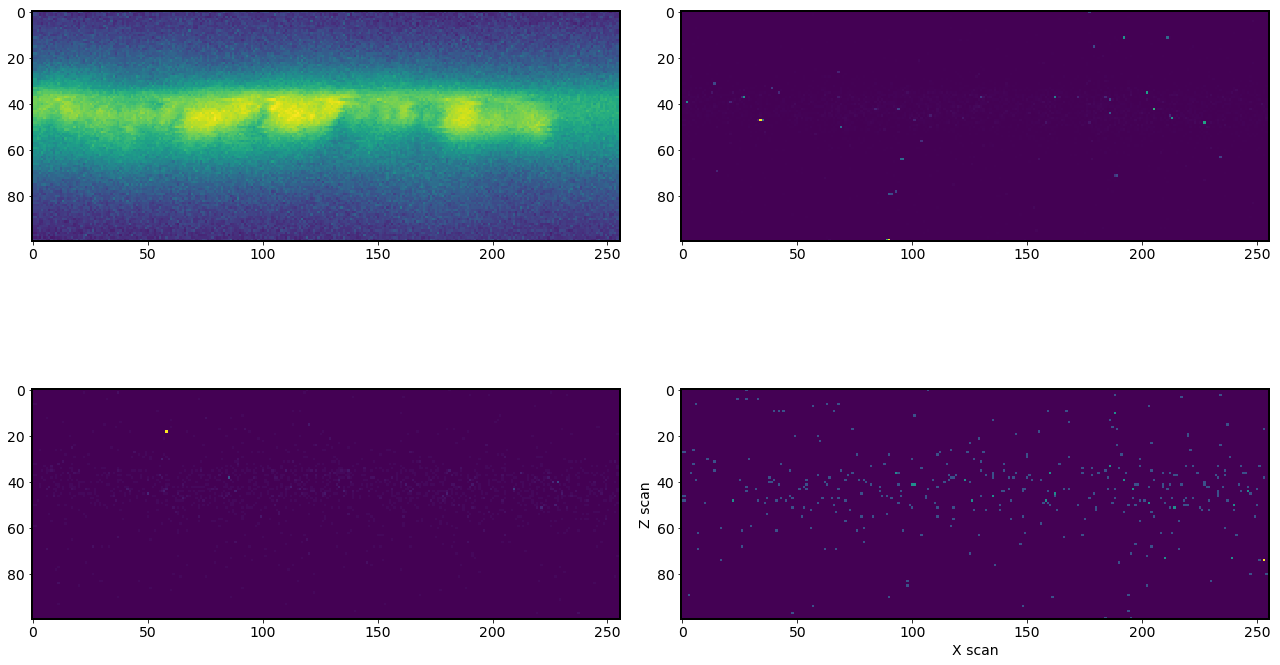

In [955]:
plot_TOMS((k30mWdfAlta450,k30mWdfBaja450,k30mWdfBanda430,k30mWdfBanda420), xw=2, yw=2, 
          vmin=4, interpolation=False, cmap='viridis', figsize=(18,12))

In [972]:
scale = (65 / 3) **2
scale

469.4444444444445

In [976]:
SG450 = k30.sum().sum()

In [977]:
BG450 = a650Tot.sum().sum() /scale

In [978]:
BG450 / SG450

9.072101180568325e-05

In [985]:
SB420 = k30mWdfBanda420.sum().sum()

In [986]:
BB420 = a650mWdfBanda420.sum().sum() / scale

In [987]:
BB420 / SB420

0.061098634859991605

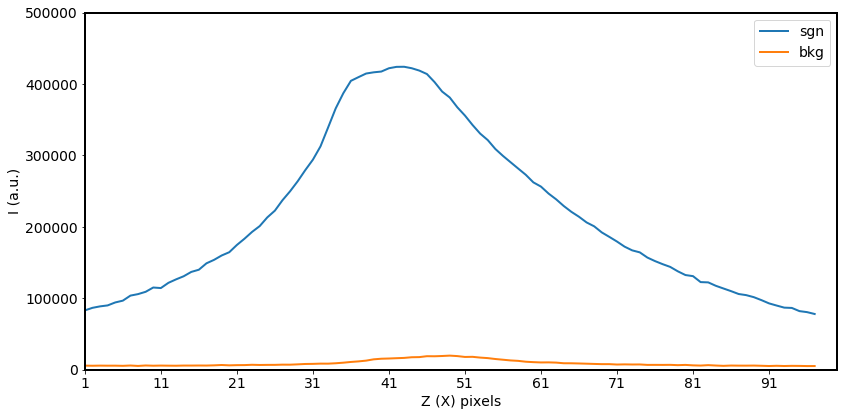

In [968]:
display_profiles((k30, a650Tot), cuts=(2,2,2), labels=('sgn','bkg'),
                 zrange=(1,100), yrange=(0,500000), xlsx=False, figsize=(12,6))

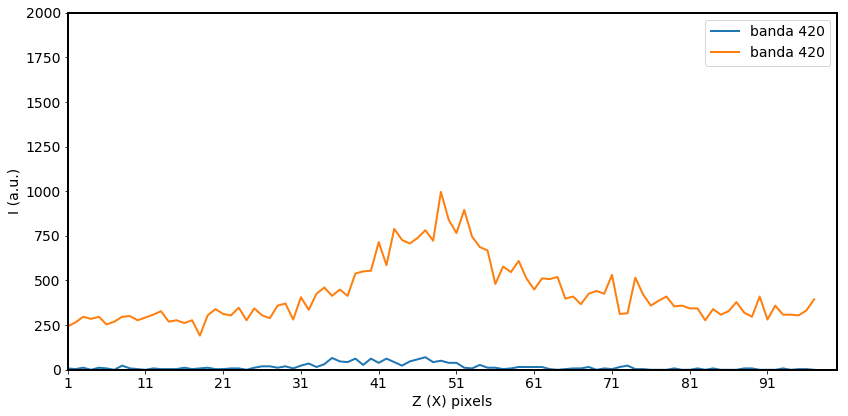

In [970]:
display_profiles((k30mWdfBanda420, a650mWdfBanda420), cuts=(2,2,2), labels=('banda 420','banda 420'),
                 zrange=(1,100), yrange=(0,2000), xlsx=False, figsize=(12,6))

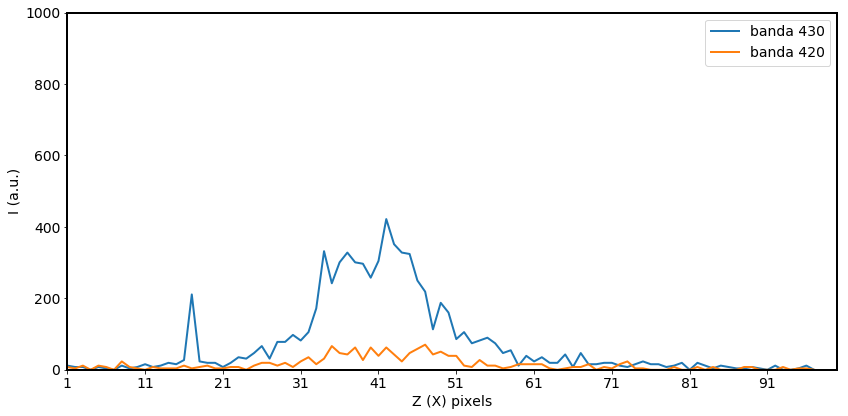

In [967]:
display_profiles((k30mWdfBanda430, k30mWdfBanda420), cuts=(2,2,2), labels=('banda 430','banda 420'),
                 zrange=(1,100), yrange=(0,1000), xlsx=False, figsize=(12,6))

In [988]:
a2100mWdfAlta450 = select_df_TOM(TOM, sample='A2', energy='100mW', filter='Alta450nm')
a2100mWdfBaja450 = select_df_TOM(TOM, sample='A2', energy='100mW', filter='Baja450nm')
a2100mWdfBanda420 = select_df_TOM(TOM, sample='A2', energy='100mW', filter='Banda420nm')
a2100mWdfBanda430 = select_df_TOM(TOM, sample='A2', energy='100mW', filter='Banda430nm')
print(f'TER = {total_energy_ratio_dfs(a2100mWdfAlta450,(a2100mWdfBaja450, a2100mWdfBanda420, a2100mWdfBanda430))}')
print(f'PER = {peak_energy_ratio_dfs(a2100mWdfAlta450,(a2100mWdfBaja450, a2100mWdfBanda420, a2100mWdfBanda430))}')

TER = [6.889126889682225, 103.55598250960647, 62.56300032020493]
PER = [7.1370305894056205, 90.81645569620254, 58.807377049180324]


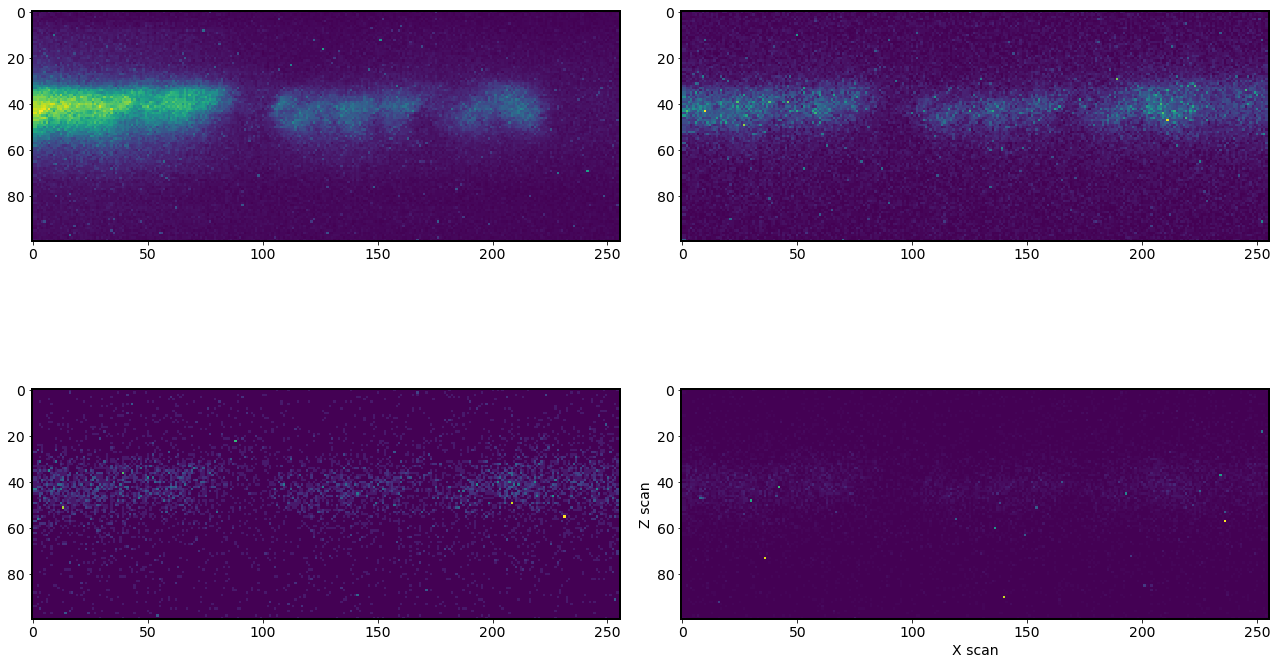

In [989]:
plot_TOMS((a2100mWdfAlta450,a2100mWdfBaja450,a2100mWdfBanda420,a2100mWdfBanda430), xw=2, yw=2, 
          vmin=4, interpolation=False, cmap='viridis', figsize=(18,12))

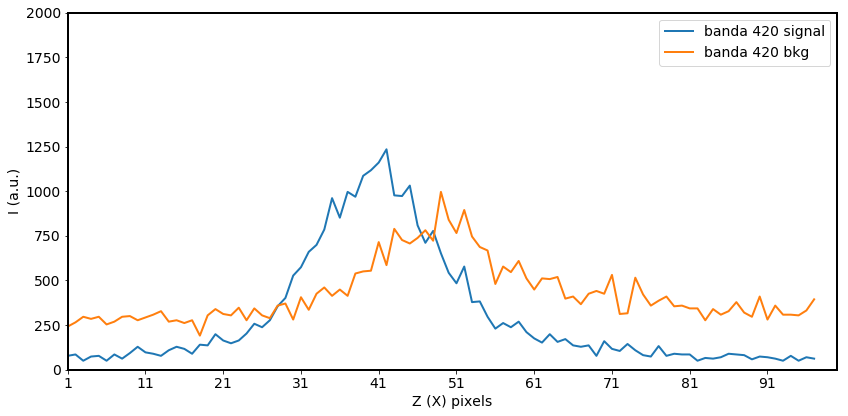

In [991]:
display_profiles((a2100mWdfBanda420, a650mWdfBanda420), cuts=(2,2,2), labels=('banda 420 signal','banda 420 bkg'),
                 zrange=(1,100), yrange=(0,2000), xlsx=False, figsize=(12,6))

In [992]:
scale = 6.5 **2
scale

42.25

In [994]:
SB420 = a2100mWdfBanda420.sum().sum()
BB420 = a650mWdfBanda420.sum().sum() / scale

In [995]:
BB420 / SB420

0.03427201372385908

## PLOT

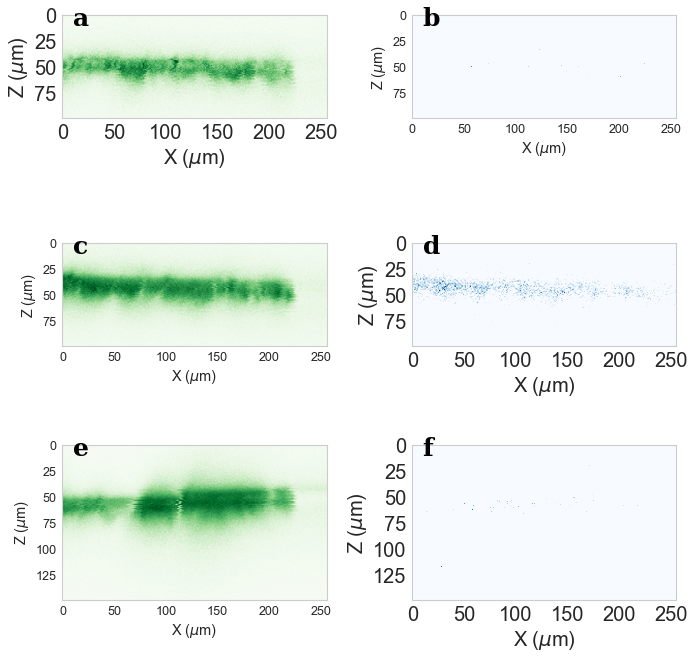

In [33]:
cmap = 'Greens'
fig = plt.figure(figsize=(10,10))
ax      = fig.add_subplot(3, 2, 1)
set_fonts(ax)

norm = cmp.colors.Normalize(vmax=tomFbiAlta450.max().max(), vmin=3)
plt.imshow(tomFbiAlta450.values.T, norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'a', fontdict=font)

ax      = fig.add_subplot(3, 2, 2)
cmap = 'Blues'
norm = cmp.colors.Normalize(vmax=tomFbiBanda420.max().max(), vmin=3)
plt.imshow(tomFbiBanda420.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'b', fontdict=font)

ax      = fig.add_subplot(3, 2, 3)
cmap = 'Greens'
norm = cmp.colors.Normalize(vmax=tomFbiAlta450SS10.max().max(), vmin=3)
plt.imshow(tomFbiAlta450SS10.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'c', fontdict=font)

ax      = fig.add_subplot(3, 2, 4)
set_fonts(ax)
cmap = 'Blues'
norm = cmp.colors.Normalize(vmax=tomFbiBanda430SS10.max().max(), vmin=3)
plt.imshow(tomFbiBanda430SS10.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'd', fontdict=font)


ax      = fig.add_subplot(3, 2, 5)
cmap = 'Greens'
norm = cmp.colors.Normalize(vmax=tomFbiAlta450ALIBa.max().max(), vmin=3)
plt.imshow(tomFbiAlta450ALIBa.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'e', fontdict=font)

ax      = fig.add_subplot(3, 2, 6)
set_fonts(ax)
cmap = 'Blues'
norm = cmp.colors.Normalize(vmax=tomFbiBanda420ALIBa.max().max(), vmin=3)
plt.imshow(tomFbiBanda420ALIBa.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'f', fontdict=font)

plt.tight_layout()
plt.savefig('/Users/pabloherrero/Dropbox/phd/talks/report_Jan2020_summary_surfphys/figures/fbi_profiles.png')
plt.show()

### Split every subplot in a file

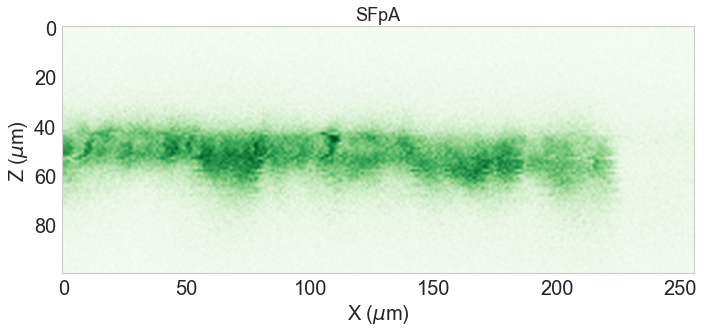

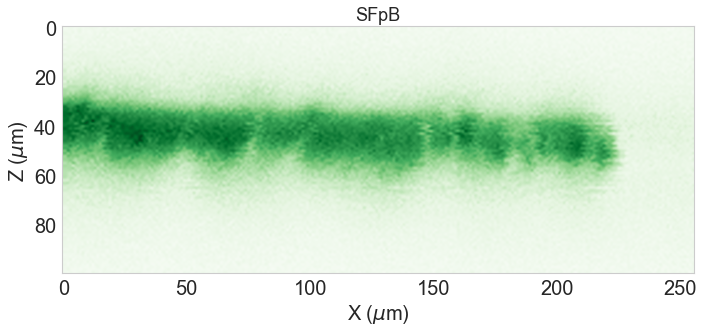

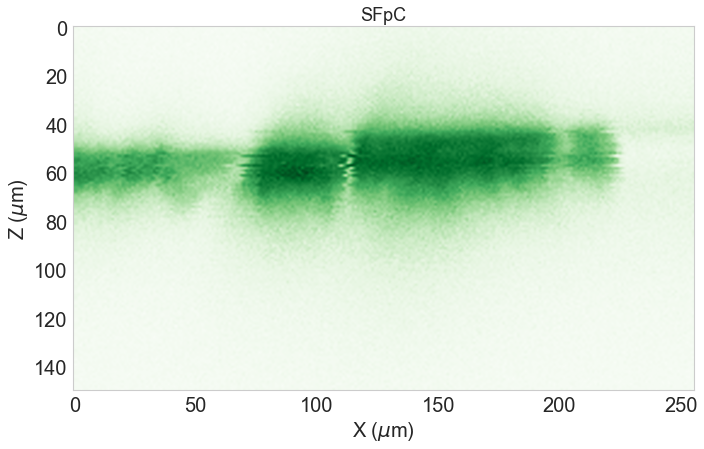

In [40]:
cmap = 'Greens'
greenPlots = [tomFbiAlta450, tomFbiAlta450SS10, tomFbiAlta450ALIBa]
name = ['2paRefG', '2paSS10G', '2paALI4G']
titles = ['SFpA', 'SFpB', 'SFpC']
for i,d in enumerate(greenPlots):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    set_fonts(ax)

    norm = cmp.colors.Normalize(vmax=d.max().max(), vmin=3)
    plt.imshow(d.values.T, norm=norm, interpolation='spline36', cmap=cmap)
    plt.xlabel('X ($\mu$m)')
    plt.ylabel('Z ($\mu$m)')
    plt.title(titles[i], fontsize=18)
    plt.tight_layout()
    plt.savefig('/Users/pabloherrero/Dropbox/phd/talks/report_Jan2020_summary_surfphys/figures/' +name[i] +'.png', bbox_inches='tight')    

In [102]:
dfA = deepcopy(tomFbiAlta450ALIBa)
dfA = dfA.iloc[:,:100]

In [ ]:
dfB = deepcopy(tomFbiBanda420ALIBa)
dfB = dfB.iloc[:,:100]

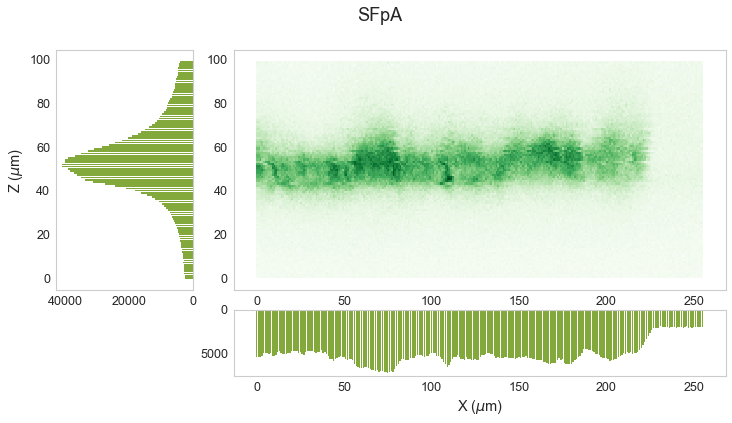

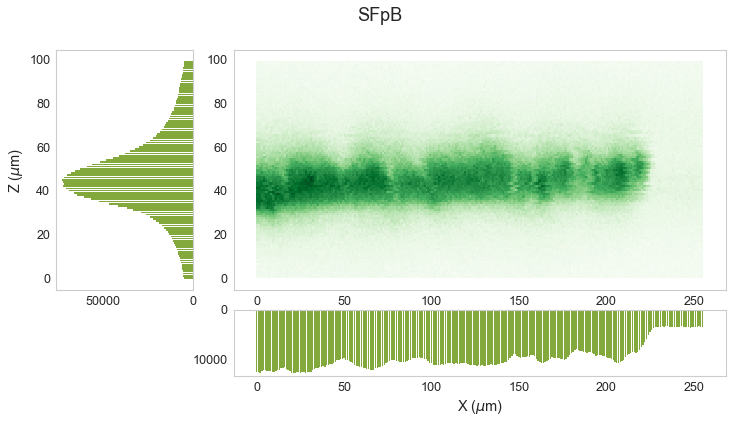

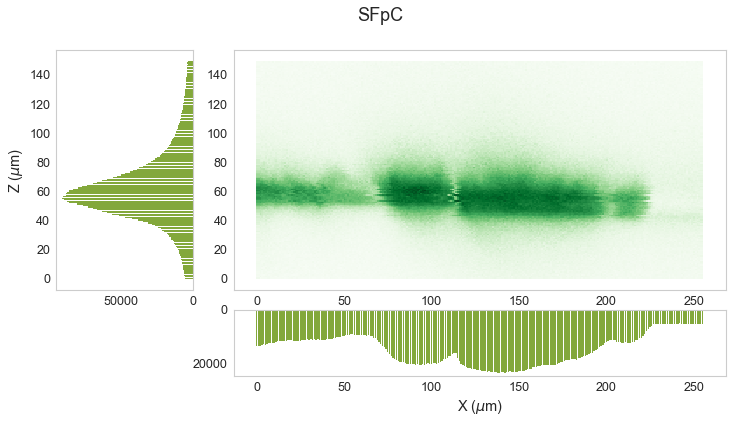

In [105]:
cmap = 'Greens'

greenPlots = [tomFbiAlta450, tomFbiAlta450SS10, tomFbiAlta450ALIBa]
name = ['2paRefG', '2paSS10G', '2paALI4G']
titles = ['SFpA', 'SFpB', 'SFpC']
for i,d in enumerate(greenPlots):
    hist_axis_pcolor(d, cmap)
    plt.suptitle(titles[i], fontsize=18)
    plt.savefig('/Users/pabloherrero/Dropbox/phd/talks/report_Jan2020_summary_surfphys/figures/' +name[i] +'.png',  bbox_inches='tight')
    

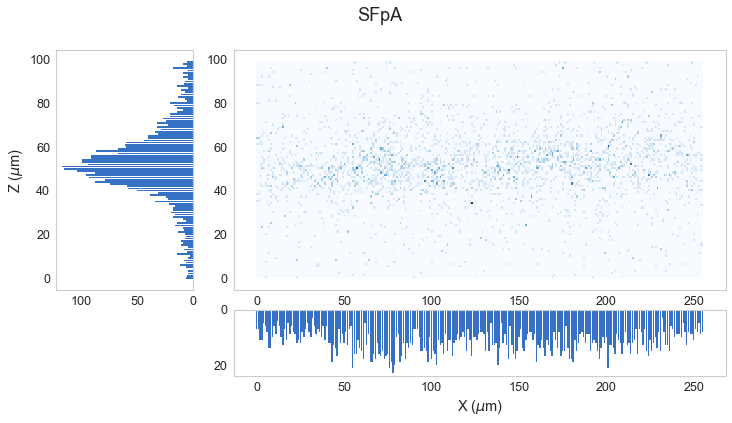

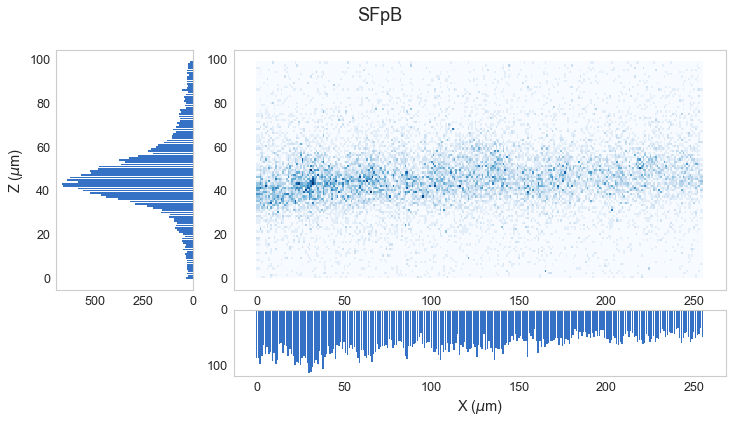

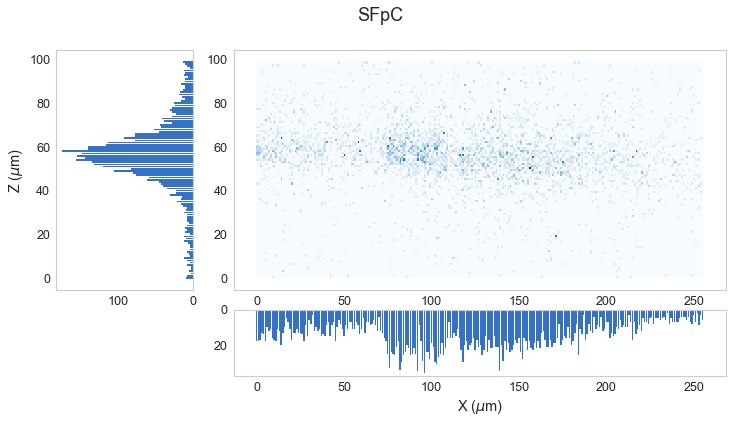

In [101]:
cmap = 'Blues'

bluePlots = [tomFbiBanda420, tomFbiBanda420SS10, dfB]
name = ['2paRefB', '2paSS10B', '2paALI4B']
titles = ['SFpA', 'SFpB', 'SFpC']
for i,d in enumerate(bluePlots):
    hist_axis_pcolor(d, cmap)
    plt.suptitle(titles[i], fontsize=18)
    plt.savefig('/Users/pabloherrero/Dropbox/phd/talks/report_Jan2020_summary_surfphys/figures/' +name[i] +'.png',  bbox_inches='tight')
    

In [104]:
def hist_axis_pcolor(df: pd.DataFrame, cmap: str):
    df.columns = range(len(df.columns))
    fig = plt.figure(figsize=(12, 6))
    grid = plt.GridSpec(4,4, hspace=0.3, wspace=0.3)

    main_ax = fig.add_subplot(grid[:-1, 1:])
    y_hist = fig.add_subplot(grid[:-1,0], sharey=main_ax)
    x_hist = fig.add_subplot(grid[-1,1:], sharex=main_ax)

    x, y = np.meshgrid(df.index, df.columns)
    norm = cmp.colors.Normalize(vmax=df.max().max(), vmin=3)
    
    pcm = main_ax.pcolor(x, y, df.T, cmap=cmap)
    
    xint = df.sum(axis=0)
    y_hist.barh(xint.index, xint.values, label='X-integrated intensity', color='g')
    y_hist.invert_xaxis()
    y_hist.set_ylabel('Z ($\mu$m)')

    zint = df.sum(axis=1)
    x_hist.bar(zint.index, zint.values, color='g')
    x_hist.invert_yaxis()
    x_hist.set_xlabel('X ($\mu$m)')
#     fig.colorbar(pcm, ax=main_ax)

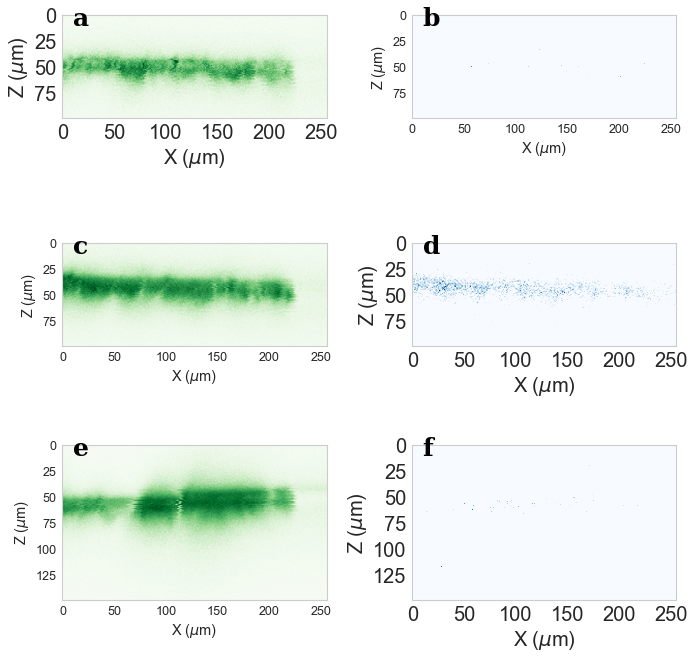

In [33]:
ax      = fig.add_subplot(3, 2, 2)
cmap = 'Blues'
norm = cmp.colors.Normalize(vmax=tomFbiBanda420.max().max(), vmin=3)
plt.imshow(tomFbiBanda420.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'b', fontdict=font)

ax      = fig.add_subplot(3, 2, 3)
cmap = 'Greens'
norm = cmp.colors.Normalize(vmax=tomFbiAlta450SS10.max().max(), vmin=3)
plt.imshow(tomFbiAlta450SS10.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'c', fontdict=font)

ax      = fig.add_subplot(3, 2, 4)
set_fonts(ax)
cmap = 'Blues'
norm = cmp.colors.Normalize(vmax=tomFbiBanda430SS10.max().max(), vmin=3)
plt.imshow(tomFbiBanda430SS10.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'd', fontdict=font)


ax      = fig.add_subplot(3, 2, 5)
cmap = 'Greens'
norm = cmp.colors.Normalize(vmax=tomFbiAlta450ALIBa.max().max(), vmin=3)
plt.imshow(tomFbiAlta450ALIBa.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'e', fontdict=font)

ax      = fig.add_subplot(3, 2, 6)
set_fonts(ax)
cmap = 'Blues'
norm = cmp.colors.Normalize(vmax=tomFbiBanda420ALIBa.max().max(), vmin=3)
plt.imshow(tomFbiBanda420ALIBa.values.T,norm=norm, interpolation='spline36', cmap=cmap)
plt.xlabel('X ($\mu$m)')
plt.ylabel('Z ($\mu$m)')
plt.text(10, 10, 'f', fontdict=font)

plt.tight_layout()
plt.savefig('/Users/pabloherrero/Dropbox/phd/talks/report_Jan2020_summary_surfphys/figures/fbi_profiles.png')
plt.show()